# **NOTEBOOK FOR ANALYSIS OF `OLIST` DATA**

**Goal is to find student dropout factors**

### **Data Import, Creating Connection and Checking the data**

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\olist review analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\olist review analysis\data\processed_data\processed_olist_data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,review_score,review_creation_date,total_unique_products,total_products,avg_price,avg_freight,is_multiple_seller,max_attempt,payment_type_used,installment_duration,total_paid_value,order_status,approval_time,delivery_time,delivery_delay,product_id,product_category_name,dimensional_weight
0,4,2018-01-18,1,2,185.0,14.0,0,1,1,8,397.26,delivered,0.0,6.0,-16.0,2.0,1.0,10.50
1,5,2018-03-10,1,1,80.0,8.0,0,1,1,1,88.09,delivered,0.0,9.0,-5.0,1.0,1.0,0.62
2,5,2018-02-17,1,1,149.0,45.0,0,1,1,1,194.12,delivered,0.0,13.0,-21.0,1.0,1.0,1.33
3,5,2017-04-21,1,1,180.0,43.0,0,1,1,1,222.84,delivered,0.0,11.0,-20.0,1.0,1.0,1.33
4,5,2018-03-01,1,1,1199.0,134.0,0,1,1,10,1333.25,delivered,0.0,18.0,-9.0,1.0,1.0,30.62


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_score           99224 non-null  int64  
 1   review_creation_date   99224 non-null  object 
 2   total_unique_products  99224 non-null  int64  
 3   total_products         99224 non-null  int64  
 4   avg_price              99224 non-null  float64
 5   avg_freight            99224 non-null  float64
 6   is_multiple_seller     99224 non-null  int64  
 7   max_attempt            99224 non-null  int64  
 8   payment_type_used      99224 non-null  int64  
 9   installment_duration   99224 non-null  int64  
 10  total_paid_value       99224 non-null  float64
 11  order_status           99224 non-null  object 
 12  approval_time          99068 non-null  float64
 13  delivery_time          96359 non-null  float64
 14  delivery_delay         96359 non-null  float64
 15  pr

In [6]:
data['review_score']=data['review_score'].apply(lambda x: 'low' if x<4 else 'high')

In [9]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_unique_products,99224.0,1.03,0.24,0.0,1.00,1.00,1.00,8.00
total_products,99224.0,1.13,0.54,0.0,1.00,1.00,1.00,21.00
avg_price,99224.0,124.63,188.92,0.0,40.00,79.00,139.00,6735.00
avg_freight,99224.0,20.02,15.81,0.0,13.00,16.00,21.00,410.00
is_multiple_seller,99224.0,0.01,0.11,0.0,0.00,0.00,0.00,1.00
max_attempt,99224.0,1.05,0.38,0.0,1.00,1.00,1.00,29.00
payment_type_used,99224.0,1.02,0.15,0.0,1.00,1.00,1.00,2.00
installment_duration,99224.0,2.93,2.72,0.0,1.00,2.00,4.00,24.00
total_paid_value,99224.0,160.56,220.32,0.0,61.88,105.28,176.71,13664.08
approval_time,99068.0,0.52,1.17,0.0,0.00,0.00,1.00,188.00


### ***Outlier Interpretation from numerical columns***
*** 
- **`average_price` column have 75th percentile value as `139` and max value as `6735`**

- **`average_freight` column have `21` as 75th percentile value, and `410` as max value**

- **`max_attempt` column have `29` as max value while 75th percentile as `1`**

- **max `total_paid_value` is `13664` while 75th percentile is `176` only**

- **max `approval_time` is `188` days while mean, and median is nearly `0`**

- **max `delivery_time` is `208` days while 75th percentile of values lies under `16`**

- **max `delivery_delay` is `188` days while 75th percentile of values lies under `0`**

***

In [11]:
data.describe(include='object').T

,count,unique,top,freq
review_score,99224,2,high,76470
review_creation_date,99224,636,2017-12-19,463
order_status,99224,8,delivered,96361


### ***Statistical insights from categorical columns***
***
- **There are 8 unique classes in `orderstatus` column**

***

In [12]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,total_unique_products,9
1,total_products,18
2,avg_price,1059
3,avg_freight,233
4,is_multiple_seller,2
5,max_attempt,21
6,payment_type_used,3
7,installment_duration,24
8,total_paid_value,27637
9,approval_time,23


In [13]:
data.select_dtypes(include='number').columns

Index(['total_unique_products', 'total_products', 'avg_price', 'avg_freight',
       'is_multiple_seller', 'max_attempt', 'payment_type_used',
       'installment_duration', 'total_paid_value', 'approval_time',
       'delivery_time', 'delivery_delay', 'product_id',
       'product_category_name', 'dimensional_weight'],
      dtype='object')

In [14]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,review_score,2
1,review_creation_date,636
2,order_status,8


In [15]:
small_cat_cols = ['is_multiple_seller','payment_type_used','product_category_name','order_status']

In [16]:
large_num_cols = ['total_products', 'avg_price',
       'avg_freight', 'max_attempt',
       'installment_duration', 'total_paid_value', 'approval_time',
       'delivery_time', 'delivery_delay', 'product_id', 'dimensional_weight']

In [17]:
large_cat_cols = ['total_unique_products']

In [18]:
taget_col = ['review_score']

## **Univariate Analysis**

### **Small Cat Cols**

In [19]:
small_cat_cols

['is_multiple_seller',
 'payment_type_used',
 'product_category_name',
 'order_status']

**is_multiple_seller**

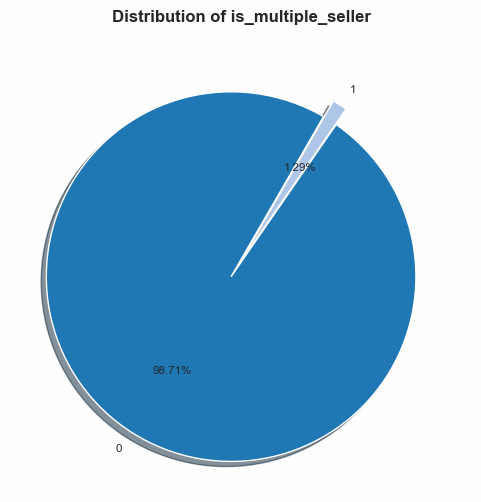

In [21]:
plt.figure(figsize=(6,6))
P.plot_pie(column='is_multiple_seller',data = data)
plt.show()

***
- **`multiple_seller` column have more than `98%`occurances of `0`**
***

**payment_type_used**

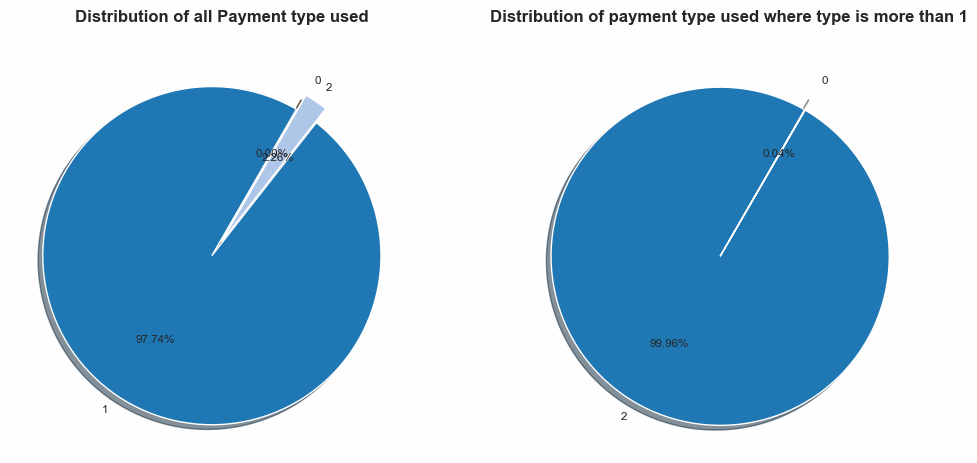

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
P.plot_pie(column='payment_type_used',data = data)
plt.title('Distribution of all Payment type used',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='payment_type_used',data = data[data['payment_type_used'] != 1])
plt.title("Distribution of payment type used where type is more than 1",weight = 'bold')
plt.show()

***
- **`97%` of times people used only single payment type**
***

**product_category_name**

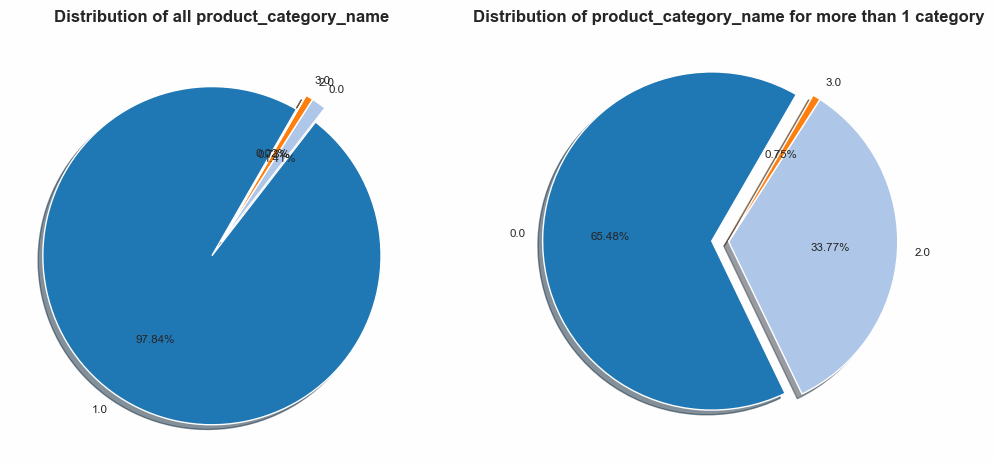

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
P.plot_pie(column='product_category_name',data = data)
plt.title('Distribution of all product_category_name',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='product_category_name',data = data[data['product_category_name'] != 1])
plt.title("Distribution of product_category_name for more than 1 category",weight = 'bold')
plt.show()

***
- **more than `97%` of occurances is `single` product category**
***

**order_status**

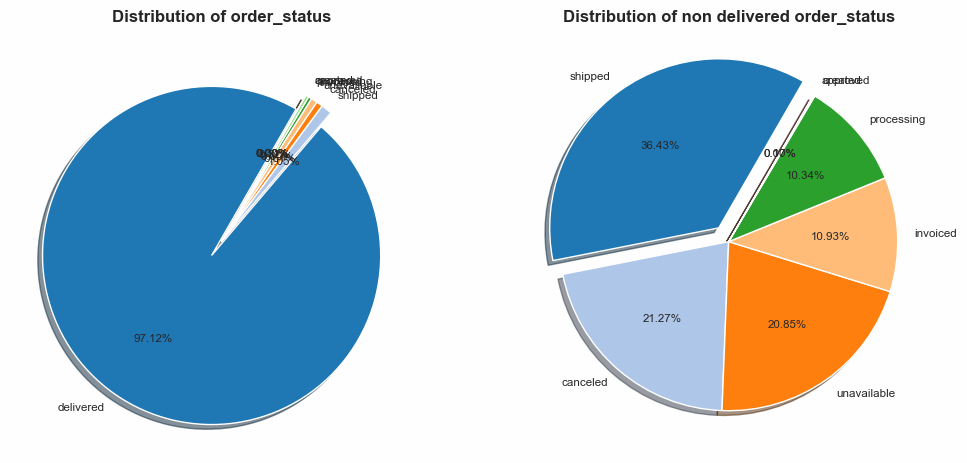

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
P.plot_pie(column='order_status',data = data)
plt.title('Distribution of order_status',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='order_status',data = data[data['order_status'] != 'delivered'])
plt.title("Distribution of non delivered order_status",weight = 'bold')
plt.show()

***
- **more than `97%` of orders are `delivered`, and among `non delivered` orders - most of the orders are `shipped`**
***

### **Large Numerical Cols**

In [42]:
large_num_cols

['total_products',
 'avg_price',
 'avg_freight',
 'max_attempt',
 'installment_duration',
 'total_paid_value',
 'approval_time',
 'delivery_time',
 'delivery_delay',
 'product_id',
 'dimensional_weight']

**total_products**

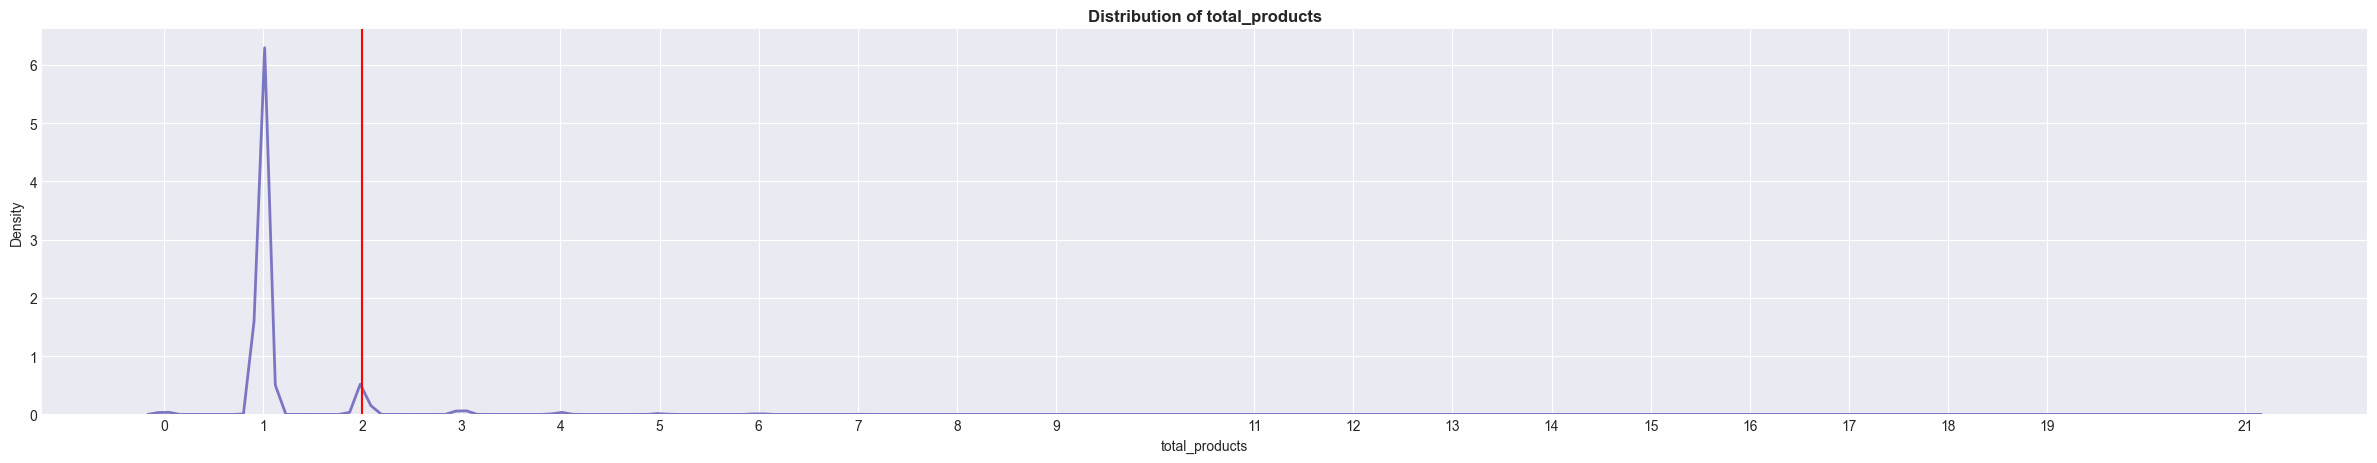

In [53]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_products',data= data)
plt.show()

In [56]:
data.groupby('total_products').size()

total_products
0       759
1     88699
2      7496
3      1311
4       503
5       204
6       194
7        22
8         8
9         3
10        8
11        5
12        5
13        1
14        2
15        2
20        1
21        1
dtype: int64

In [60]:
data['total_products']=data['total_products'].apply(lambda x: '7+' if x>6 else str(x))

In [61]:
data['total_products'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99224 entries, 0 to 99223
Series name: total_products
Non-Null Count  Dtype 
--------------  ----- 
99224 non-null  object
dtypes: object(1)
memory usage: 775.3+ KB


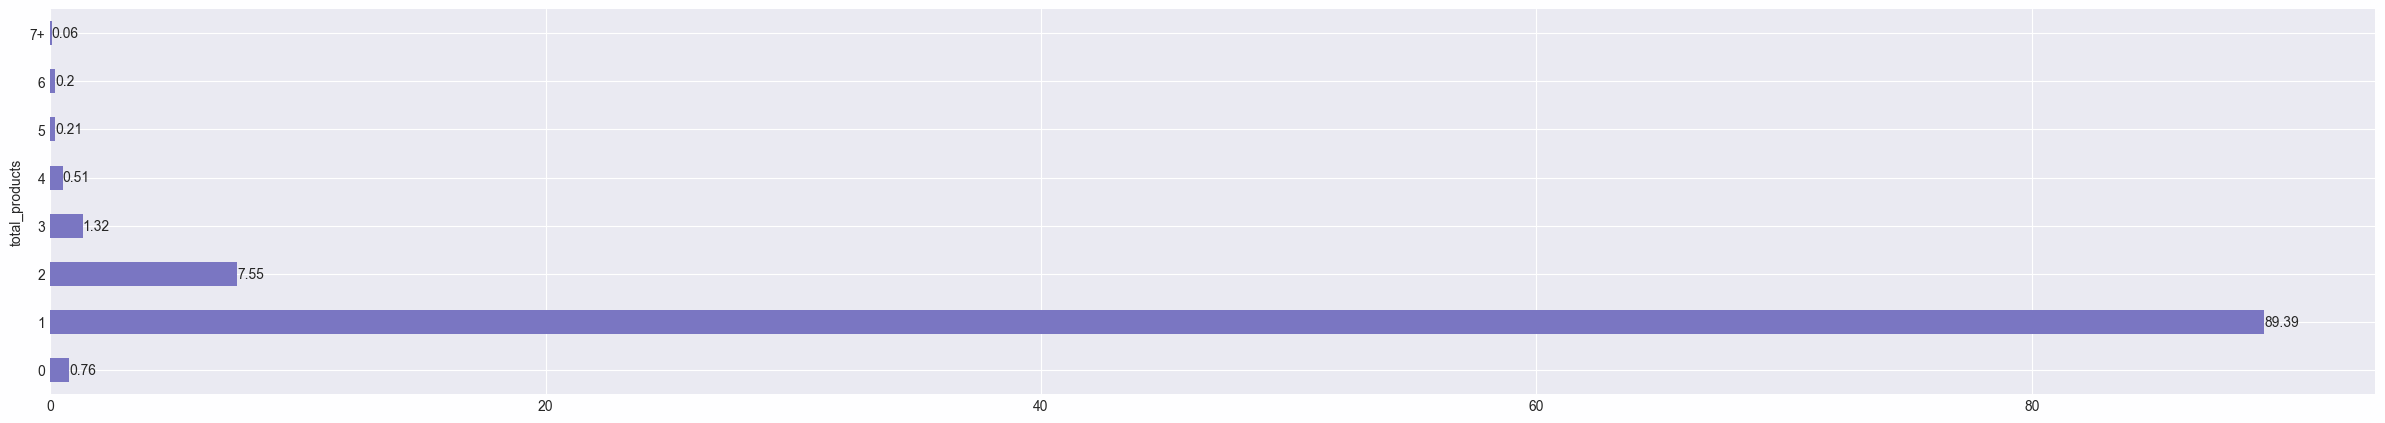

In [68]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_products').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **in `~90%` of observations, `total_procuts` is `1` for any order**
***

**avg_price**

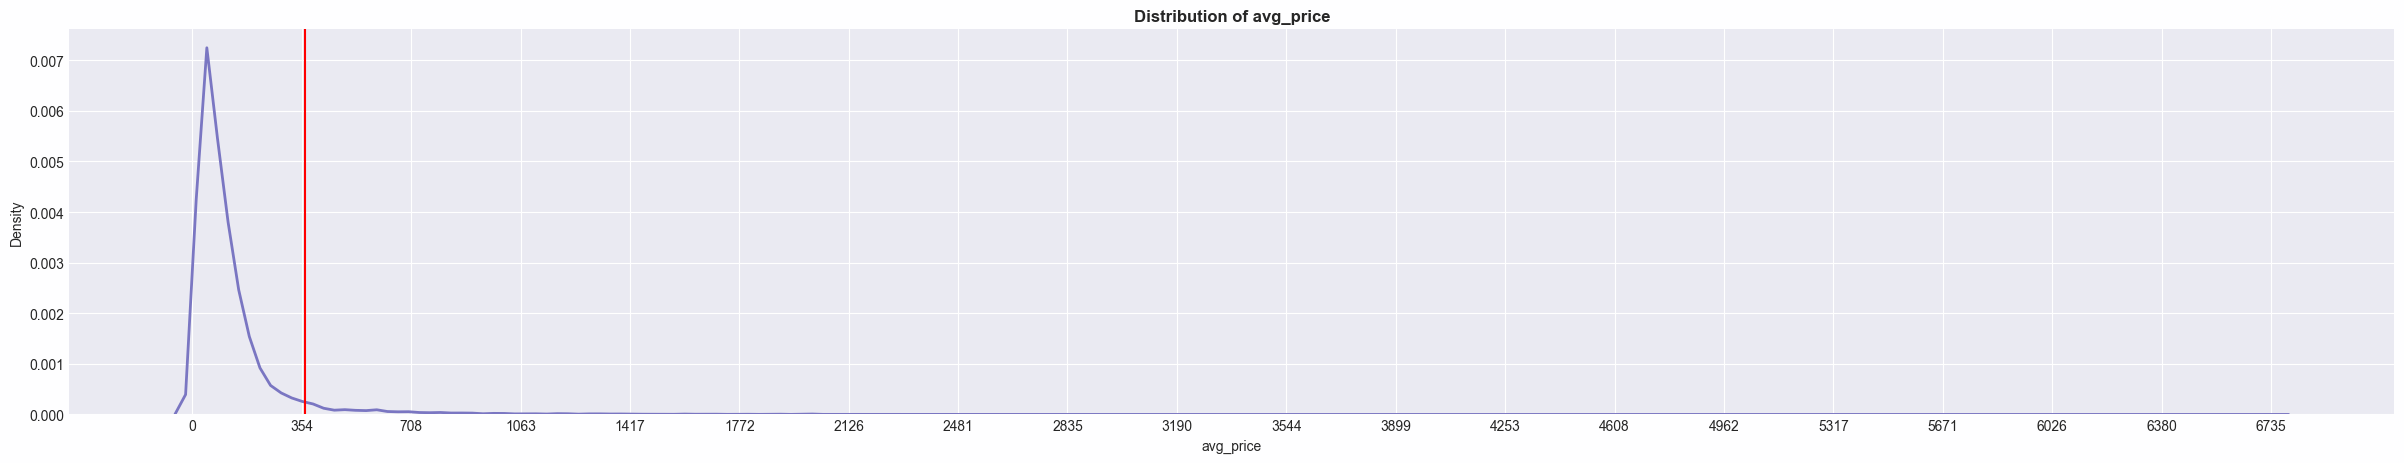

In [54]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_price',data= data)
plt.show()

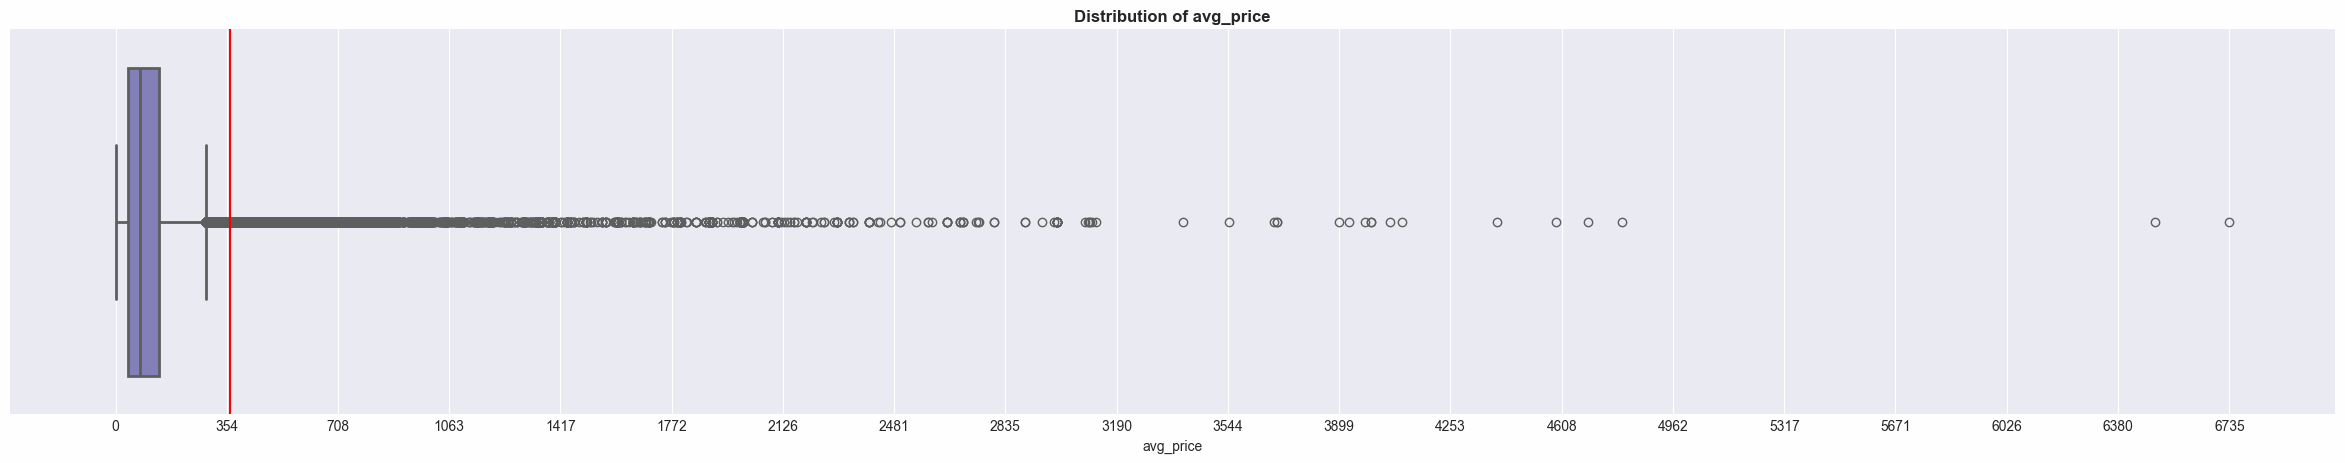

In [70]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_price',data= data)
plt.show()

***
- **`average_price` have many outliers, and the 95th percentile value is around 350**

- **`average_price` is skewed towards right**
***

**avg_freight**

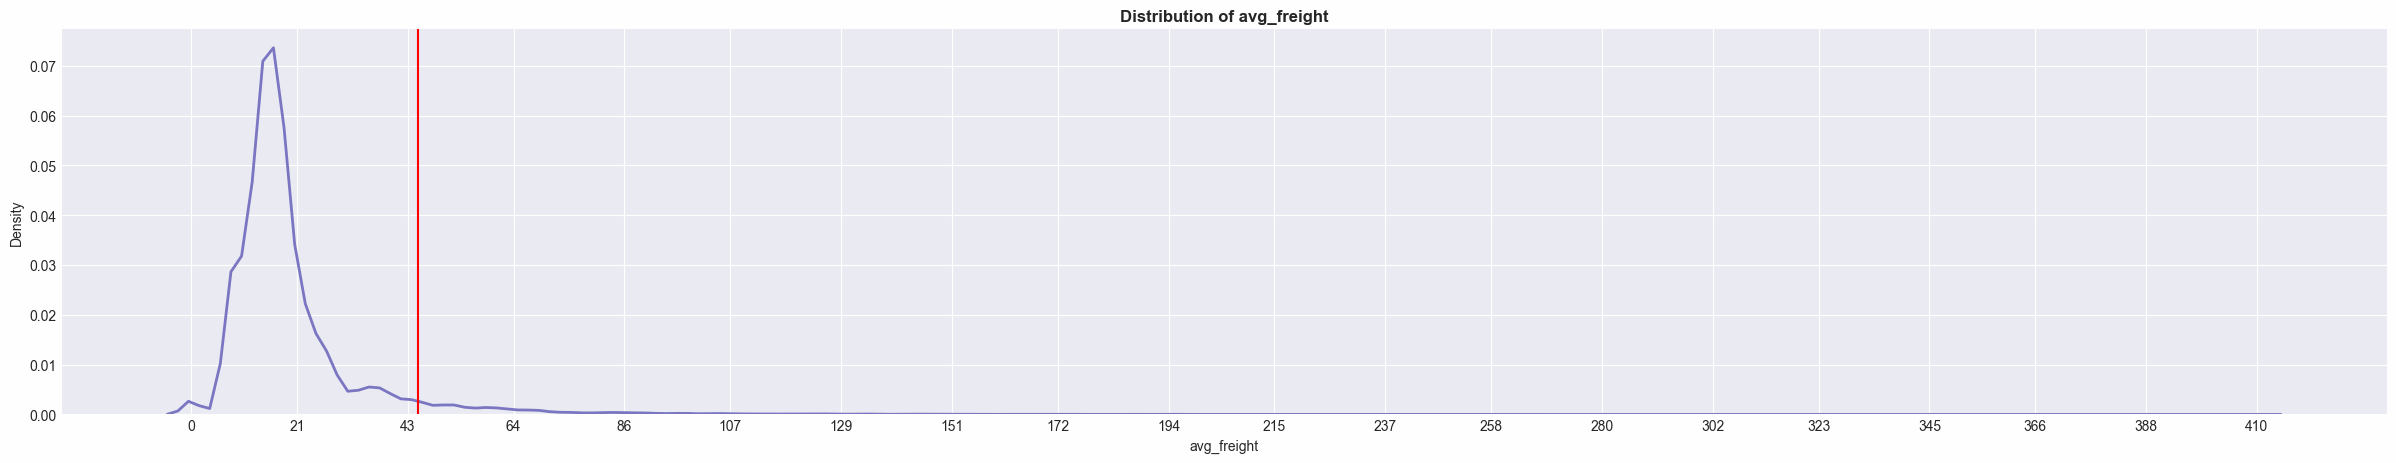

In [71]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_freight',data= data)
plt.show()

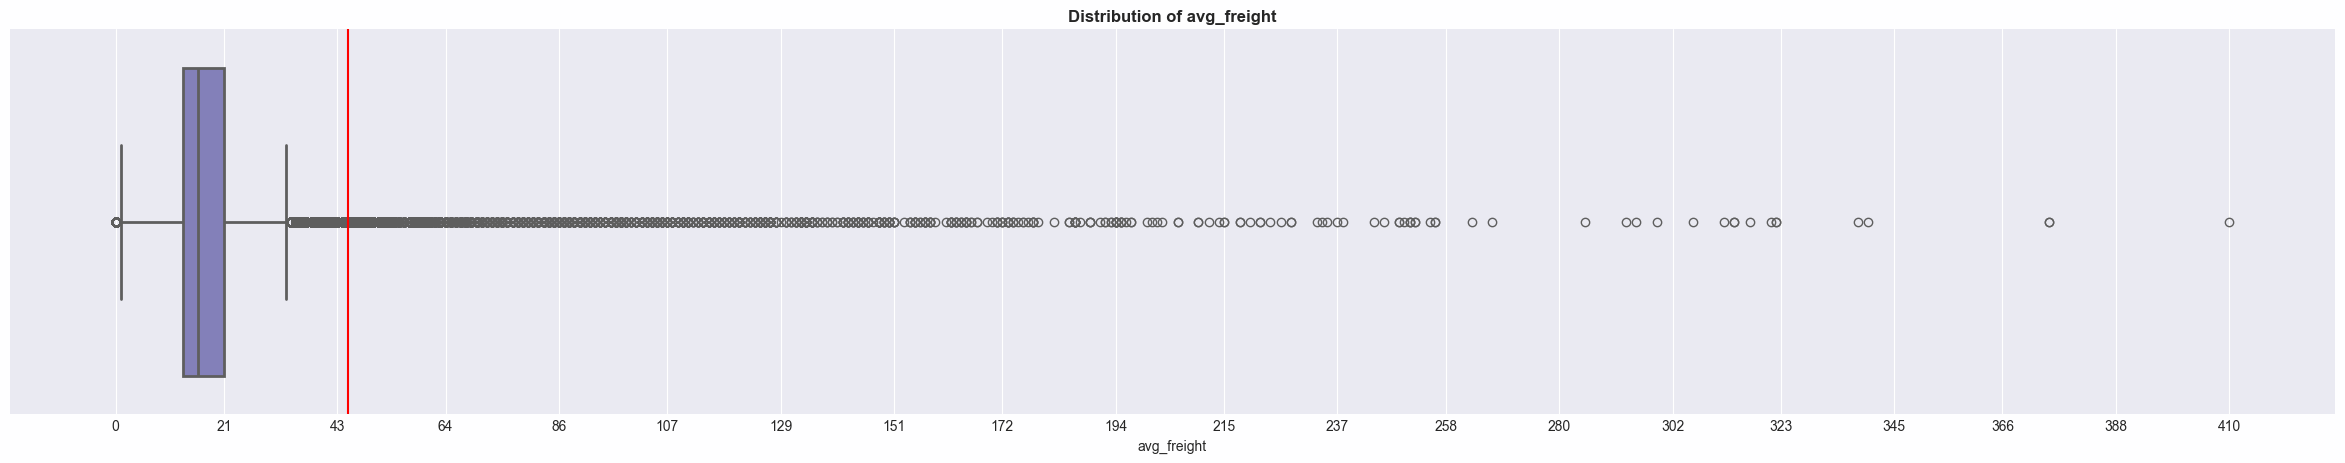

In [72]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_freight',data= data)
plt.show()

***
- **`average_freight` have many outliers, and the 95th percentile value is around 45**

- **`average_freight` is skewed towards right**
***

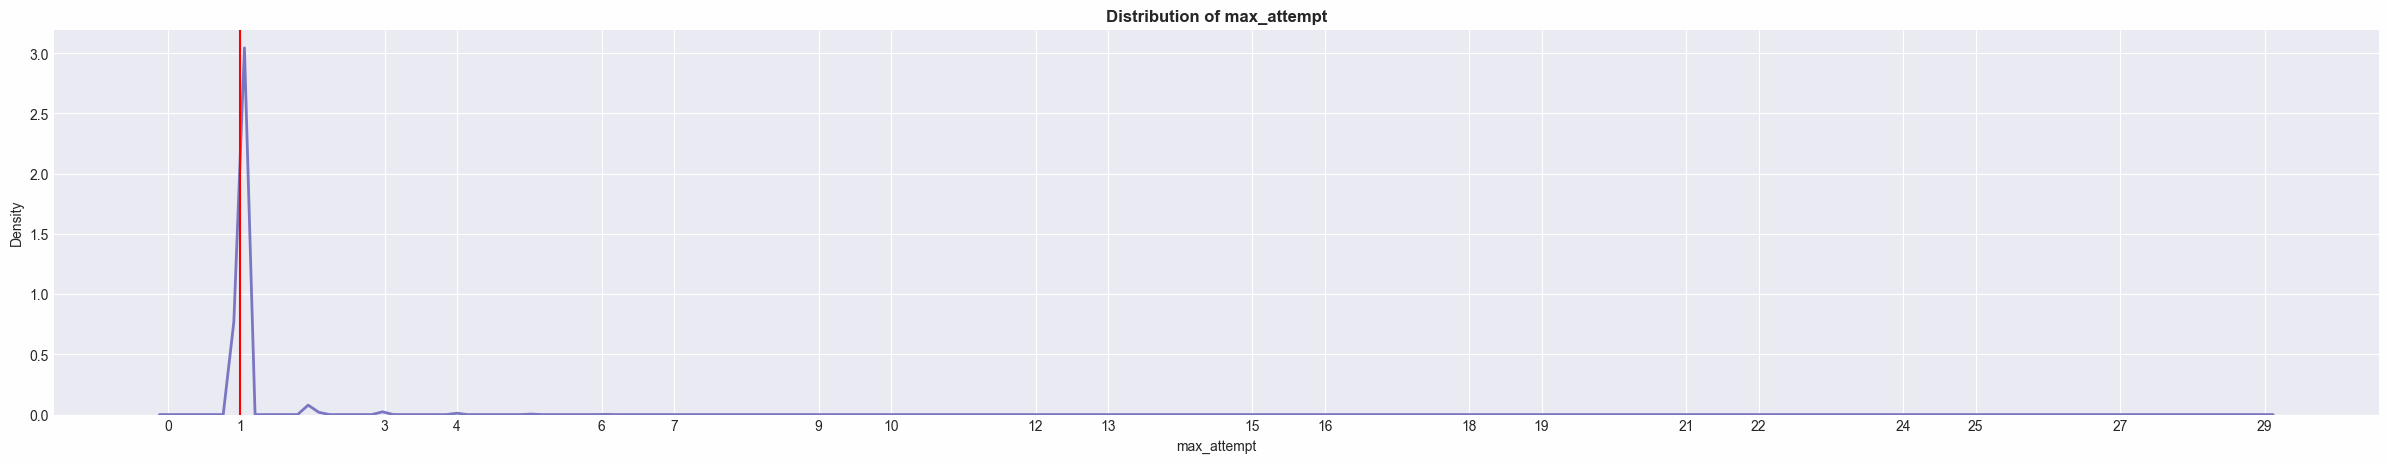

In [75]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'max_attempt',data= data)
plt.show()

In [77]:
data.groupby('max_attempt').size()

max_attempt
0         1
1     96194
2      2446
3       302
4       109
5        52
6        36
7        28
8        12
9         9
10        5
11        8
12        9
13        3
14        2
15        2
19        2
21        1
22        1
26        1
29        1
dtype: int64

In [78]:
data['max_attempt']=data['max_attempt'].apply(lambda x: '4+' if x>=4 else str(x))

In [80]:
data['max_attempt']=data['max_attempt'].apply(lambda x: '4+' if x=='0' else str(x))

In [81]:
data.groupby('max_attempt').size()

max_attempt
1     96194
2      2446
3       302
4+      282
dtype: int64

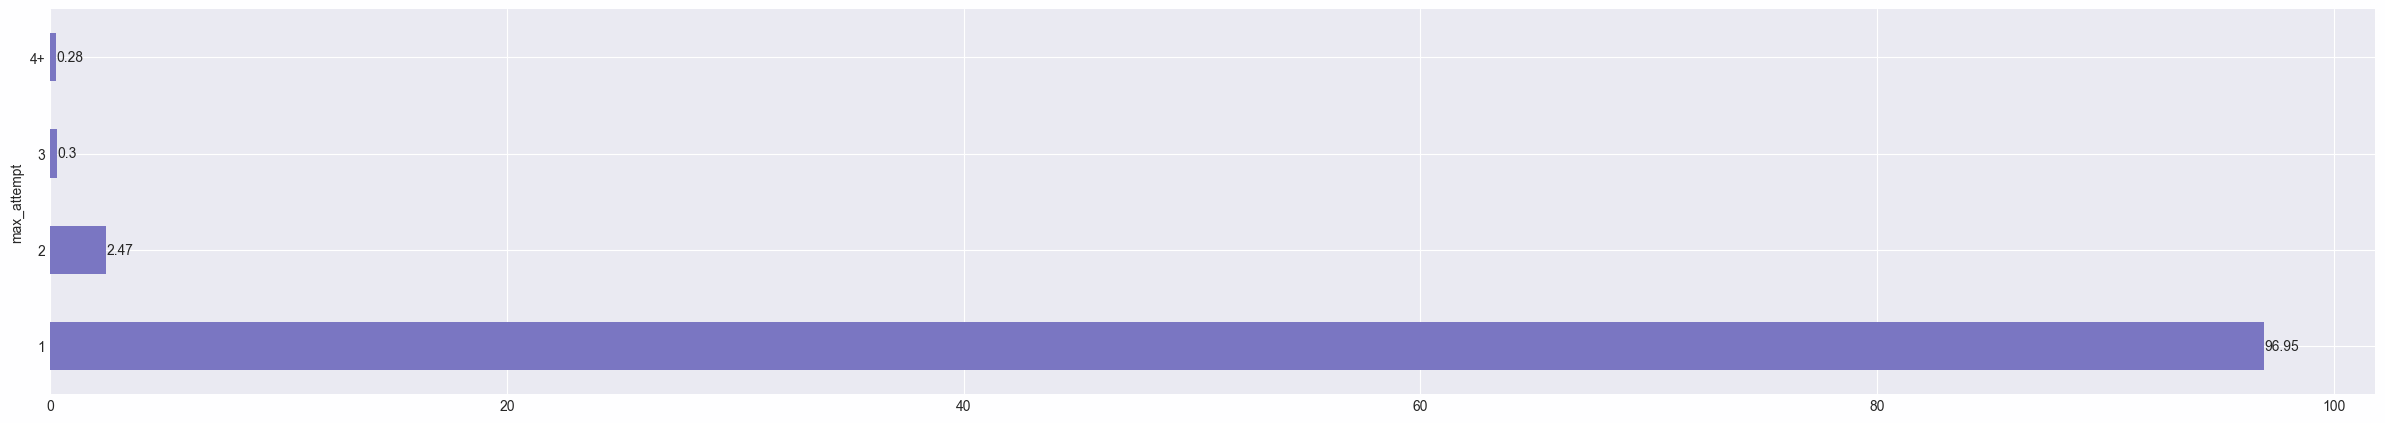

In [82]:
plt.figure(figsize=(30,5))
ax = data.groupby('max_attempt').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **`max_attempt` have value 1 as ~97% of total observations**

- **less than `1%` of people attempted `4+` times**
***

**installment_duration**

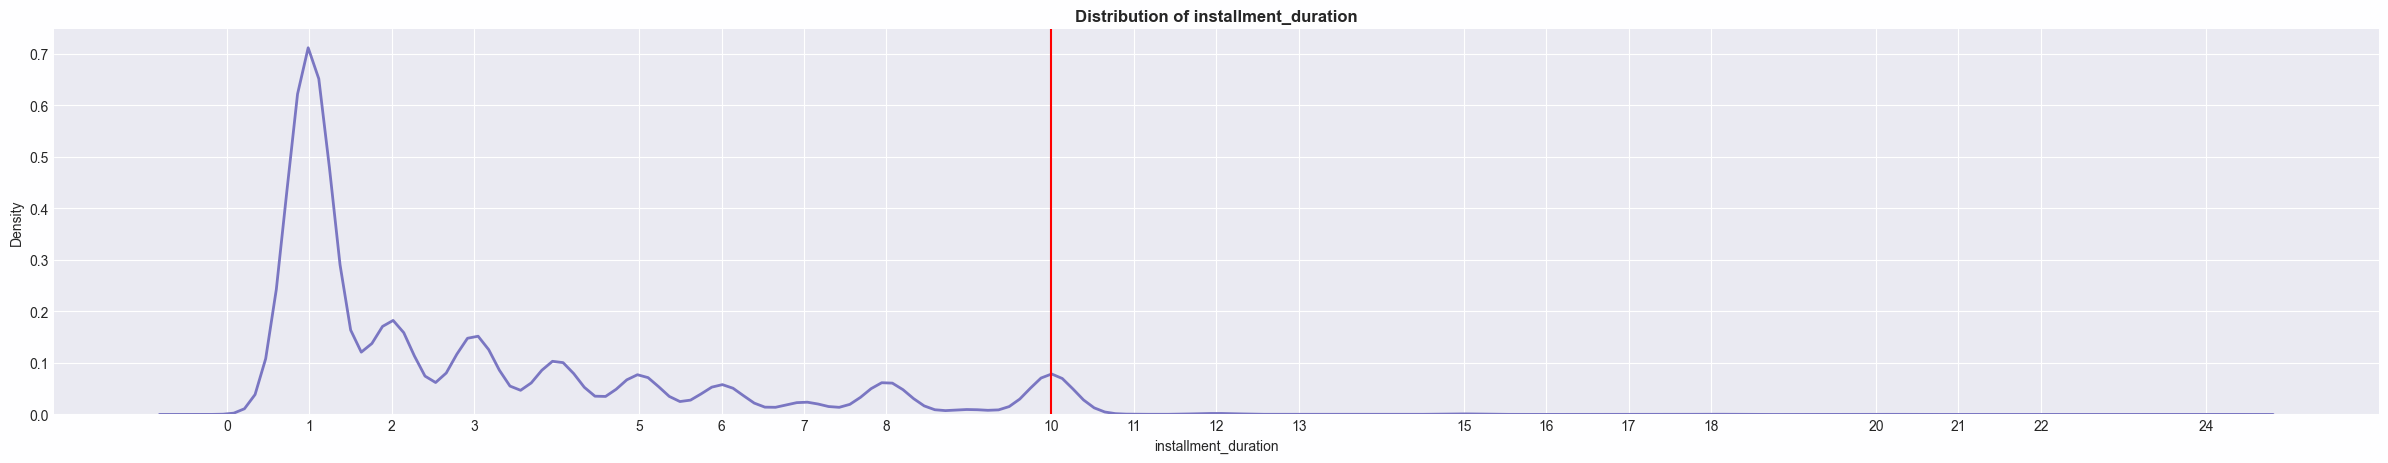

In [84]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'installment_duration',data= data)
plt.show()

In [ ]:
data.groupby('installment_duration').size()

installment_duration
0         3
1     48168
2     12305
3     10404
4      7067
5      5213
6      3908
7      1615
8      4253
9       638
10     5310
11       22
12      133
13       17
14       15
15       73
16        5
17        8
18       27
20       16
21        4
22        1
23        1
24       18
dtype: int64

In [86]:
data['installment_duration']=data['installment_duration'].apply(lambda x: '10+' if (x>10) | (x == 0)  else str(x))

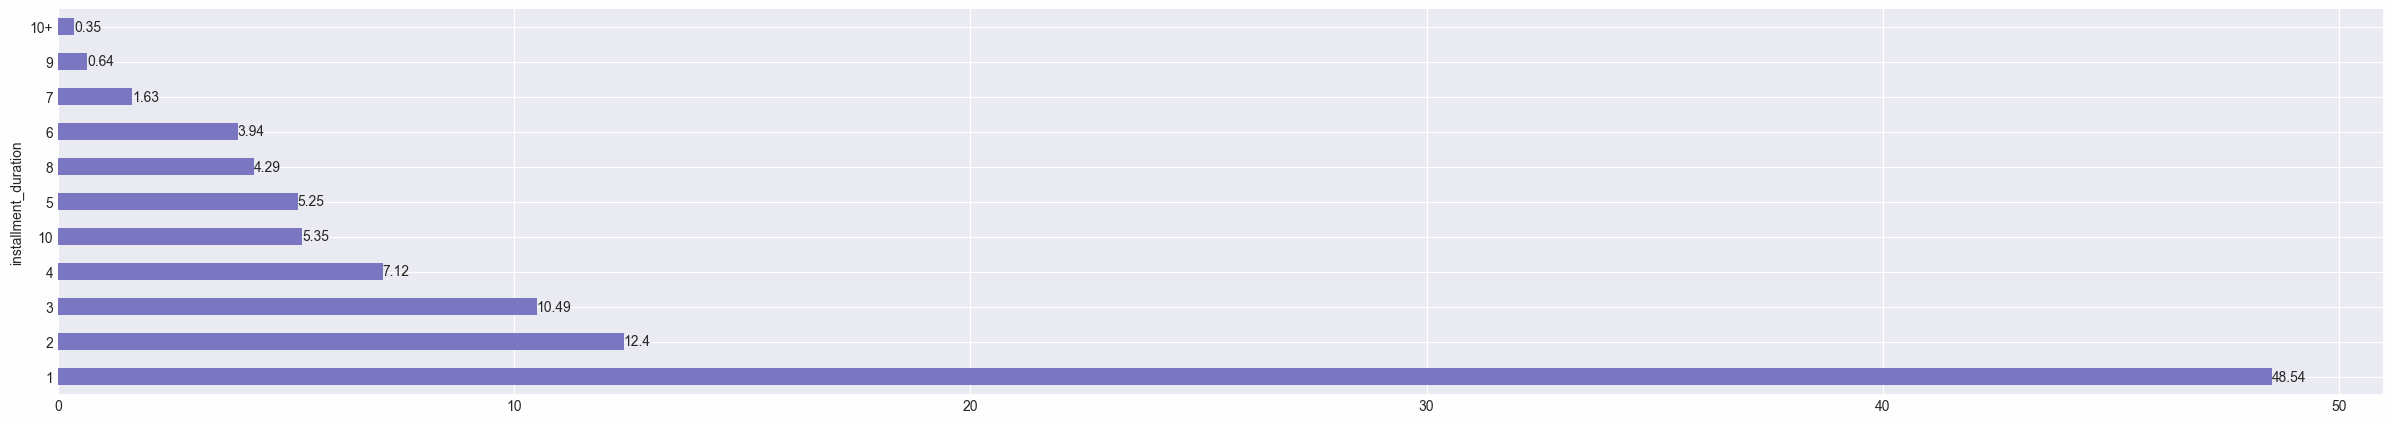

In [90]:
plt.figure(figsize=(30,5))
ax = data.groupby('installment_duration').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **nearly `half` of the observation have `1` in `payment_installment` column**

- **less than `.5%` of observation have `10+` installments**
***

**total_paid_value**

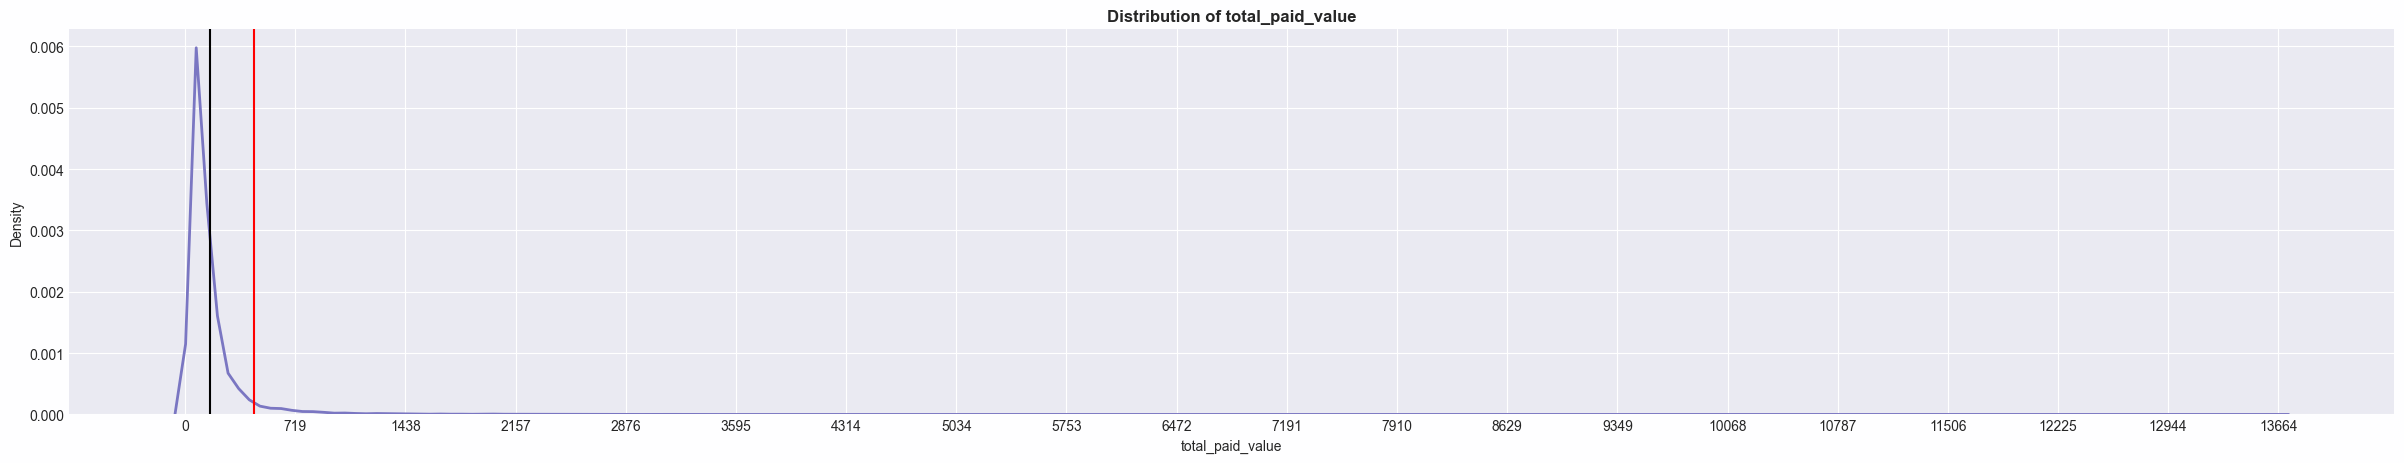

In [102]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_paid_value',data= data)
plt.axvline(data['total_paid_value'].mean(),color = 'black')
plt.show()

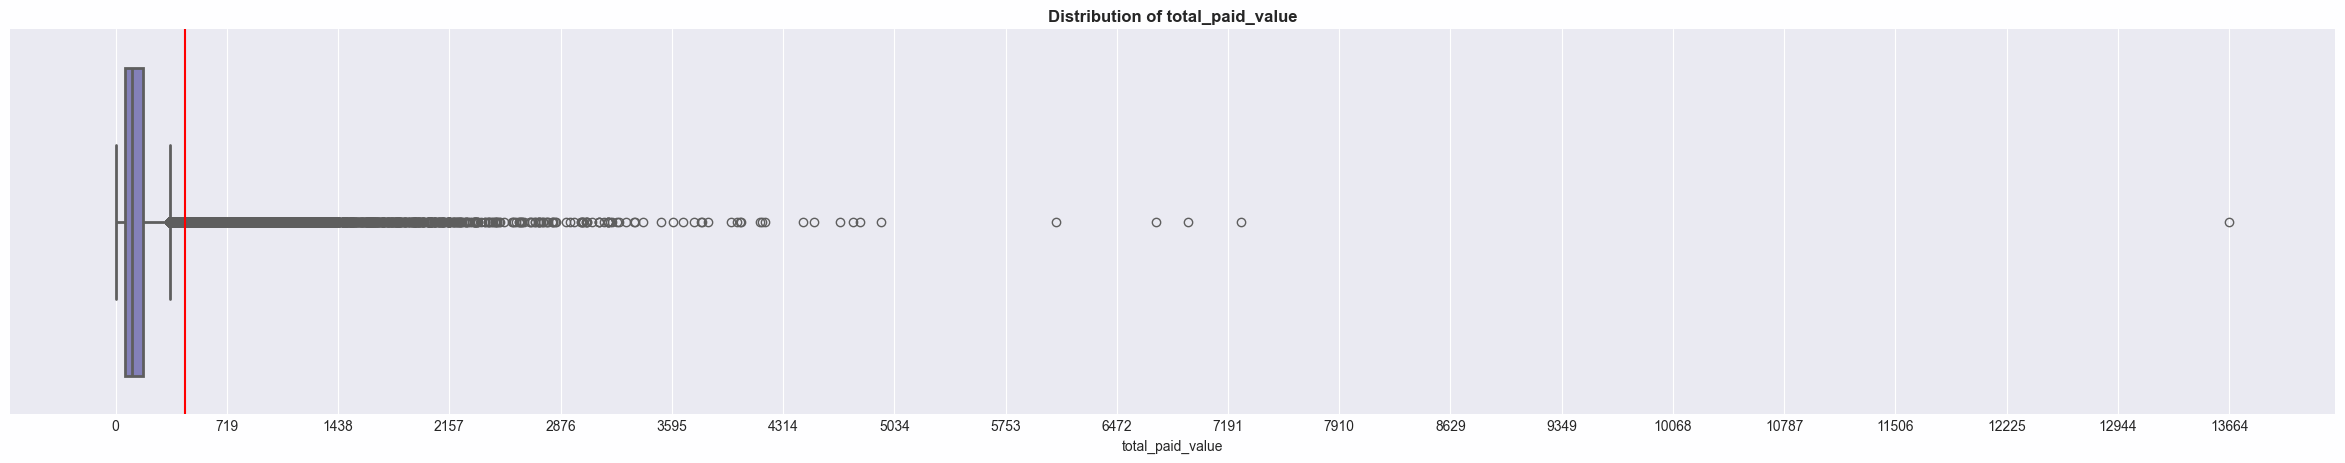

In [97]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'total_paid_value',data= data)
plt.show()

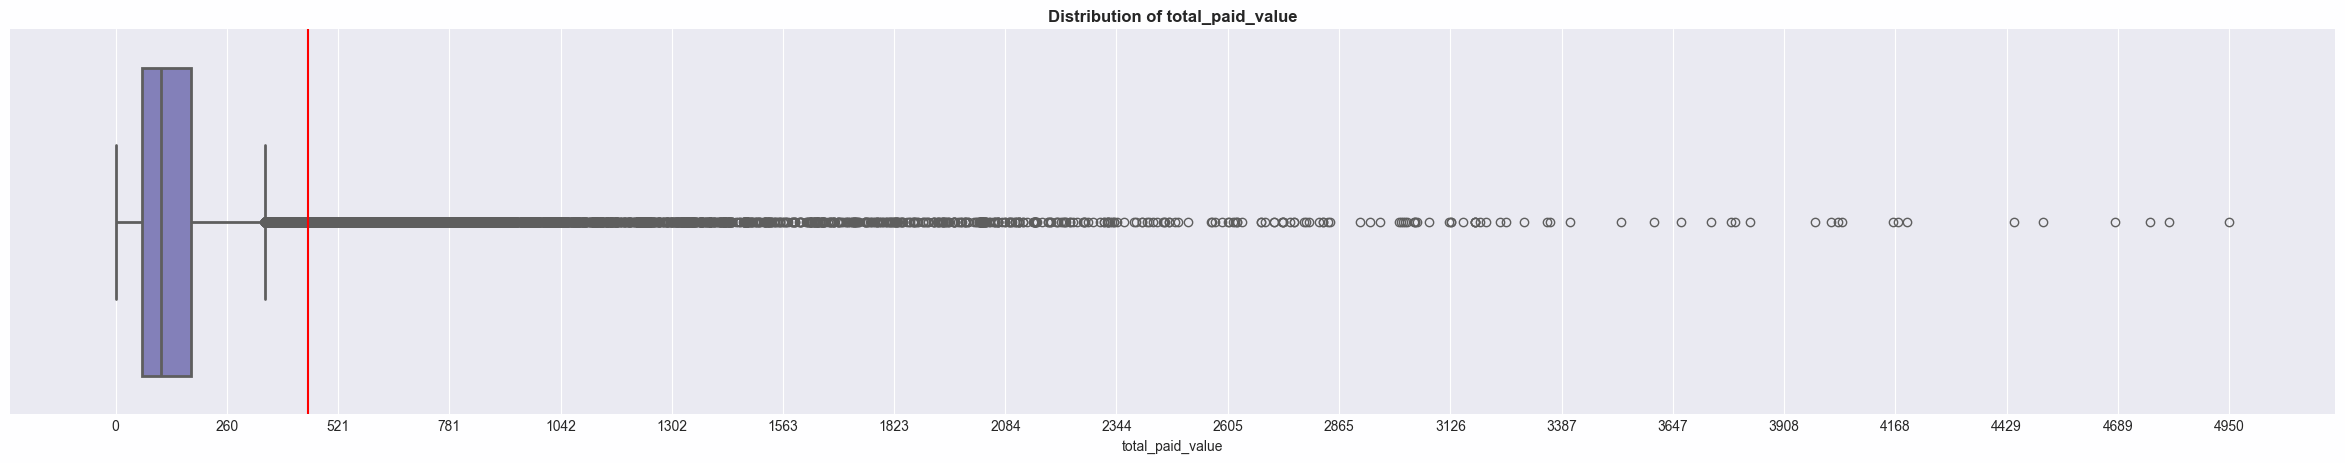

In [100]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'total_paid_value',data= data[data['total_paid_value']<5000])
plt.show()

***
- **`total_paid_value` is very `skewed` towards `right`, having small sample of outliers at the higher end**
***

**approval_time**

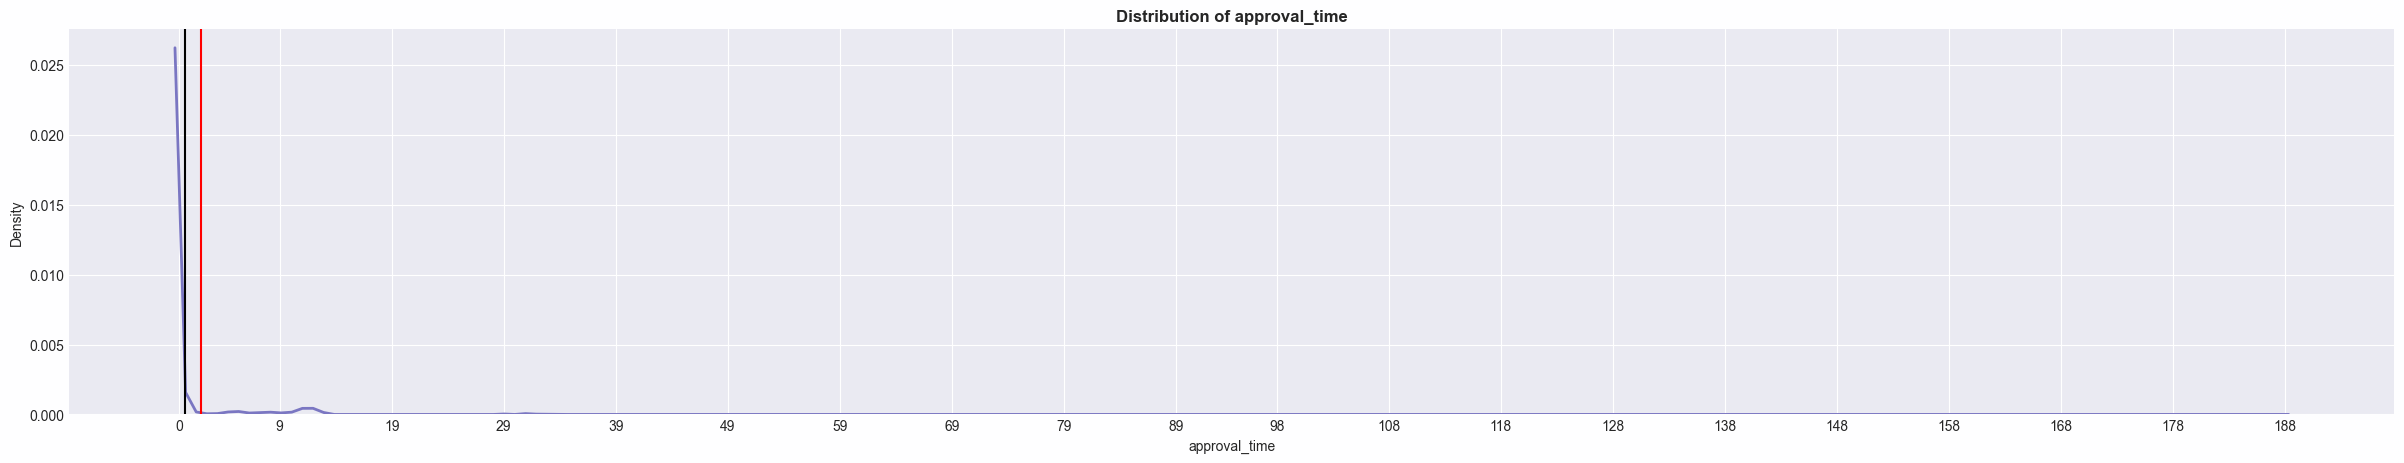

In [103]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'approval_time',data= data)
plt.axvline(data['approval_time'].mean(),color = 'black')
plt.show()

In [104]:
data.groupby('approval_time').size()

approval_time
0.0      68569
1.0      17145
2.0       9183
3.0       2256
4.0       1351
5.0        406
6.0         60
7.0         28
8.0         16
9.0          6
10.0         6
11.0        13
12.0        13
13.0         5
17.0         1
23.0         2
24.0         1
29.0         1
31.0         2
32.0         1
33.0         1
60.0         1
188.0        1
dtype: int64

In [107]:
data['approval_time']=np.where(
    data['approval_time'] == 0,'same day',
        np.where(data['approval_time']<4, 'standard',
            np.where(data['approval_time']< 13 ,'2 weeks','2 week+'
                     )
            )
)

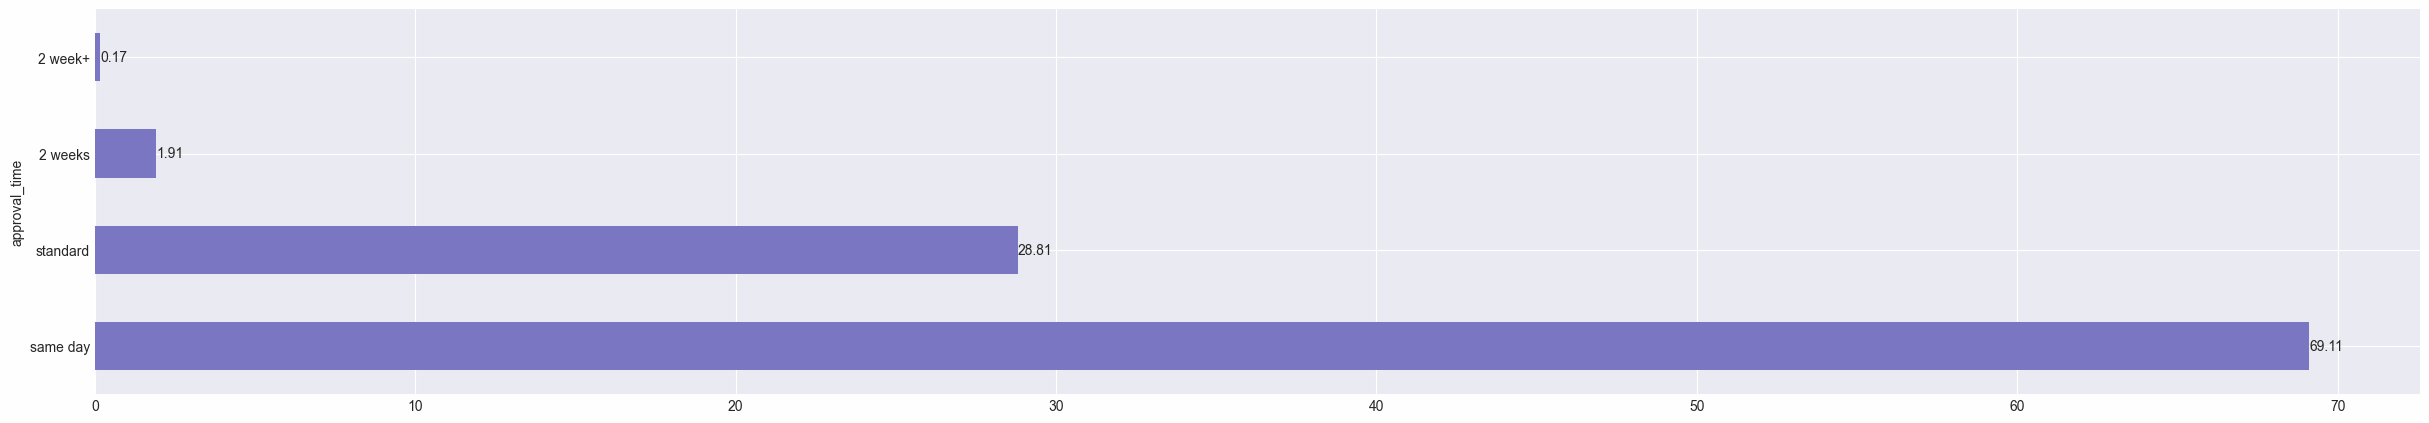

In [108]:
plt.figure(figsize=(30,5))
ax = data.groupby('approval_time').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **almost `70%` of observations include `same day` approval, only nearly `.2%` is `more than 2 weeks`**
***

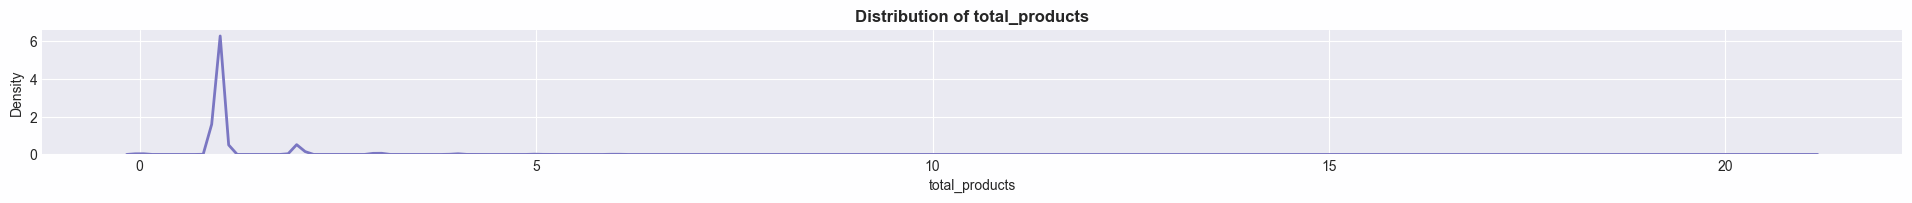

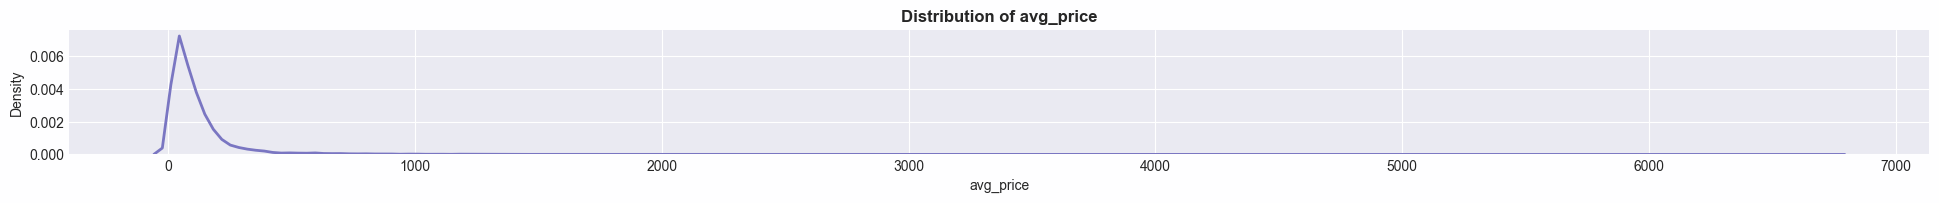

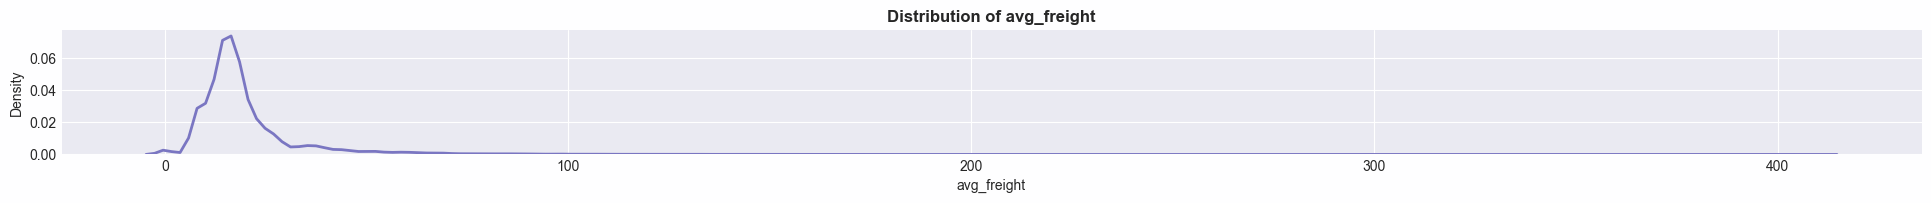

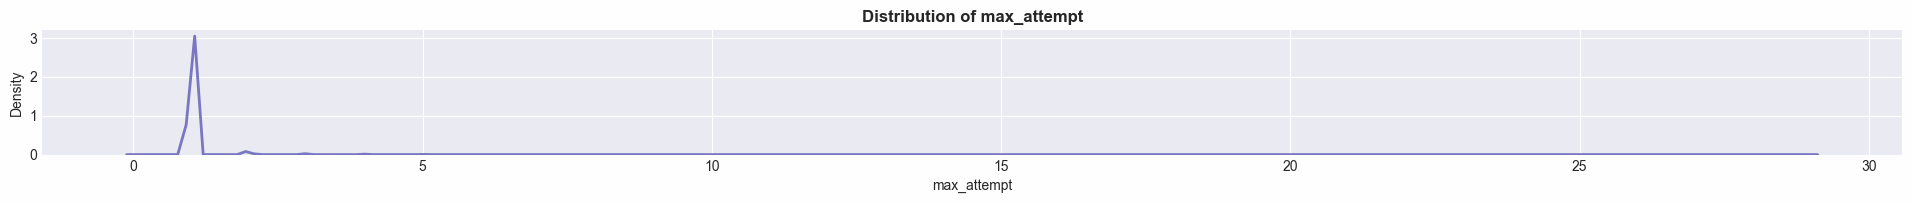

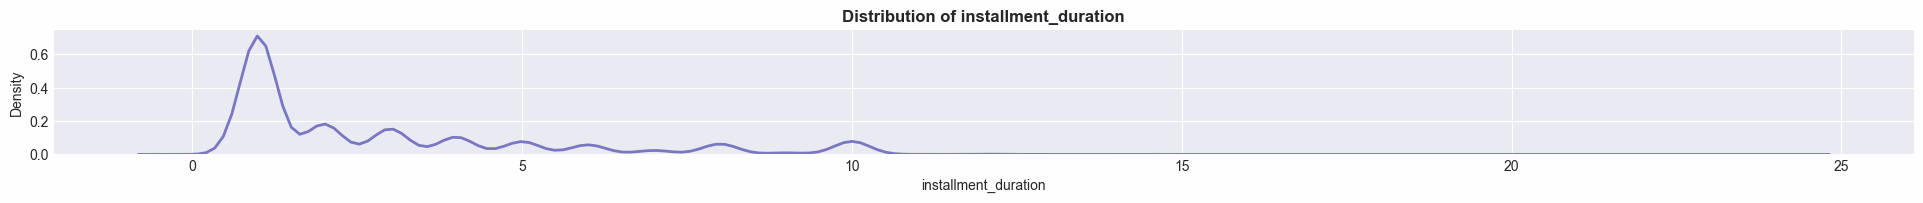

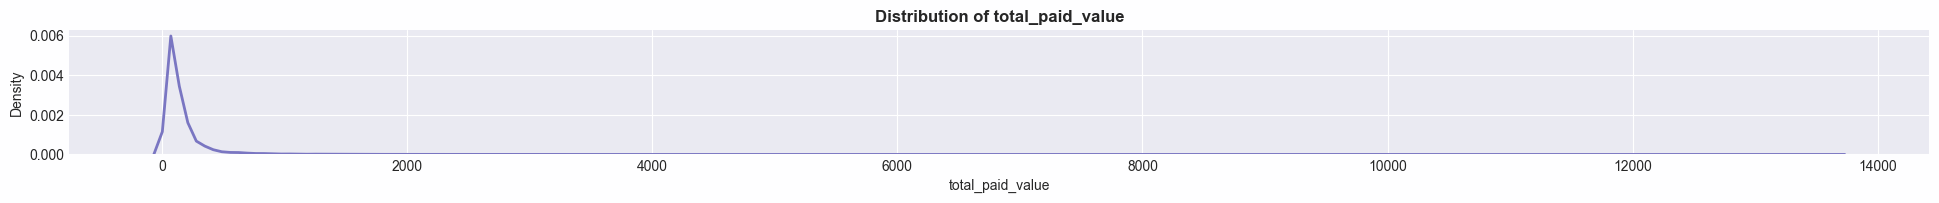

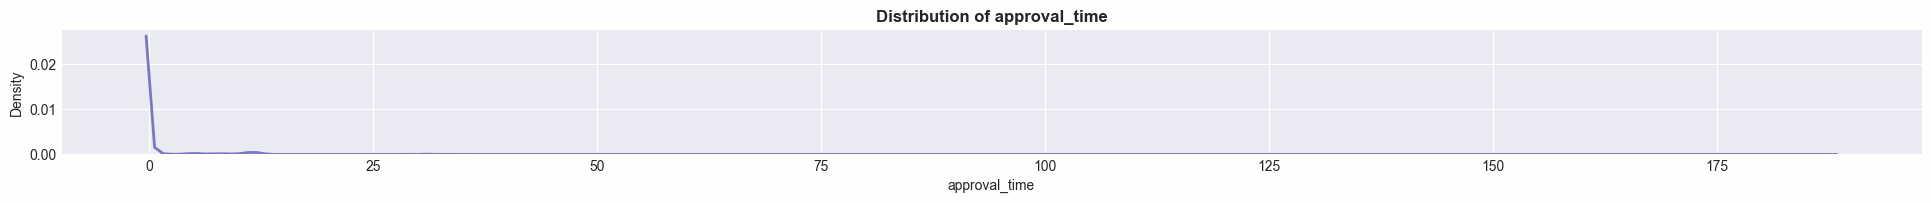

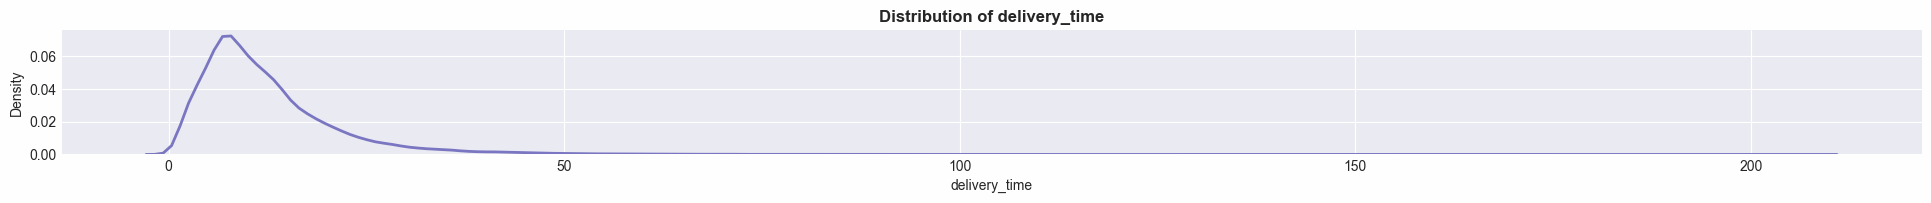

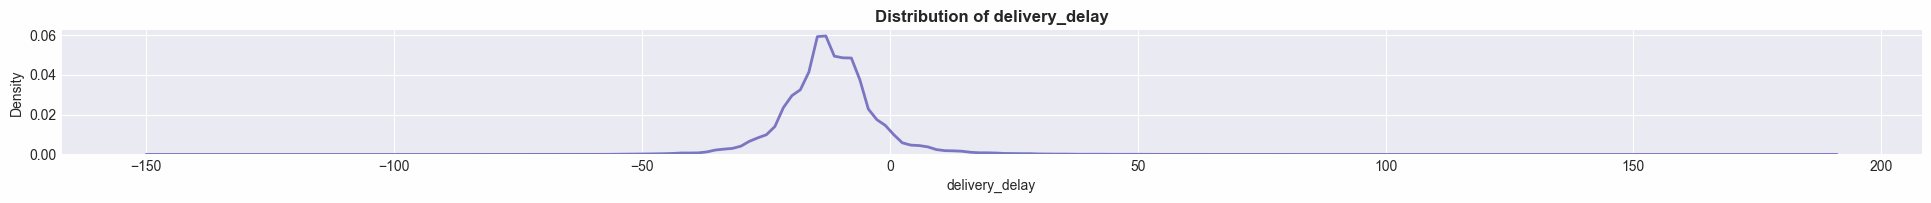

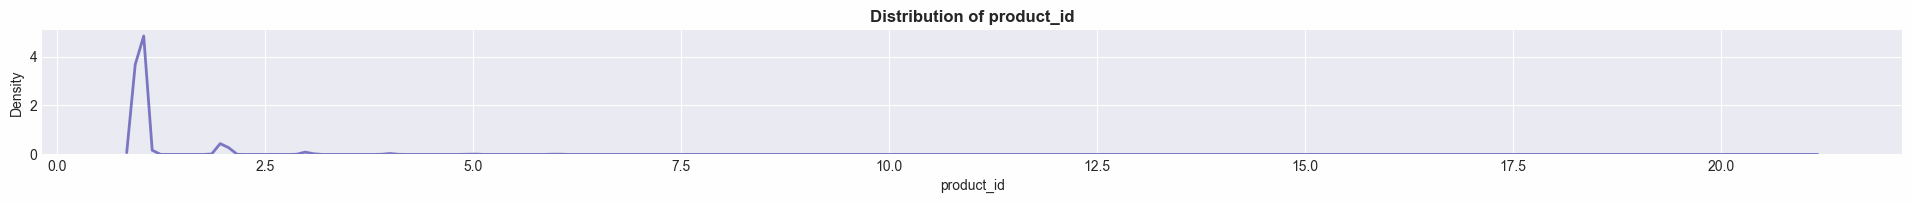

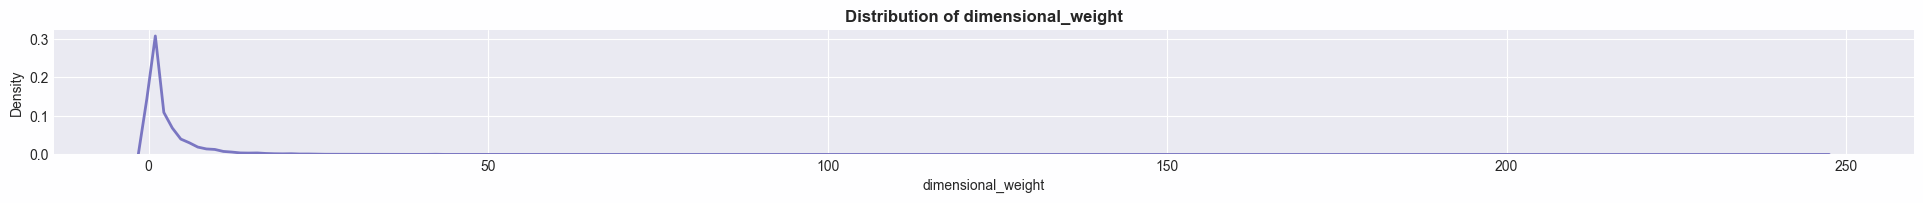

In [17]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(11,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

### ***Insights from univariate analysis of numerical columns***

- values in `review_score` columns mostly around 5 and data is skewed towards left

- distribution of `total_unique_products` is peaked around value 1 and skewed to the right

- distribution of `total_products` is very skewed towards right with a peak towards lower end

- `avg_price` and `avg_freight` column values are peaked at low end with skewed distribution

- `max_attempt` column values are peaked at low end with skewed distribution

- most of the values of `installment_duration` column is at lower end

- `total_paid_value` is skewed towards right

- `approval_time` is peaked at 0 with skeweness to the right

- `delivery_time` has a peak at lower end

- `delivery_delay` is mostly around 0 with skewed at both sides

- `product_id` and `product_category_name` is peaked around 1

- `dimensional_weight` is peaked around 0 with skewed towards right

In [18]:
for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,total_unique_products,% of observations
0,1,95.97
1,2,2.87
2,0,0.76
3,3,0.30
4,4,0.07
5,6,0.01
6,5,0.01
7,7,0.00
8,8,0.00


'__________________________________________________'

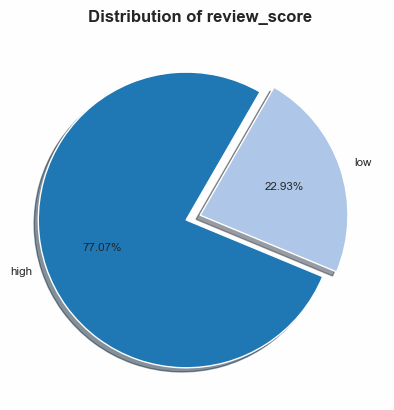

In [19]:
P.plot_pie(column='review_score',data=data)

### **Statistical Insight from target column**

- approx 77% of total reviews are high

***

## **Bivariate Analysis with `review_score` column**

### **Categorical Columns with small sub-caetgories with target**

In [20]:
small_cat_cols

['is_multiple_seller',
 'payment_type_used',
 'product_category_name',
 'order_status']

**is_multiple_seller**

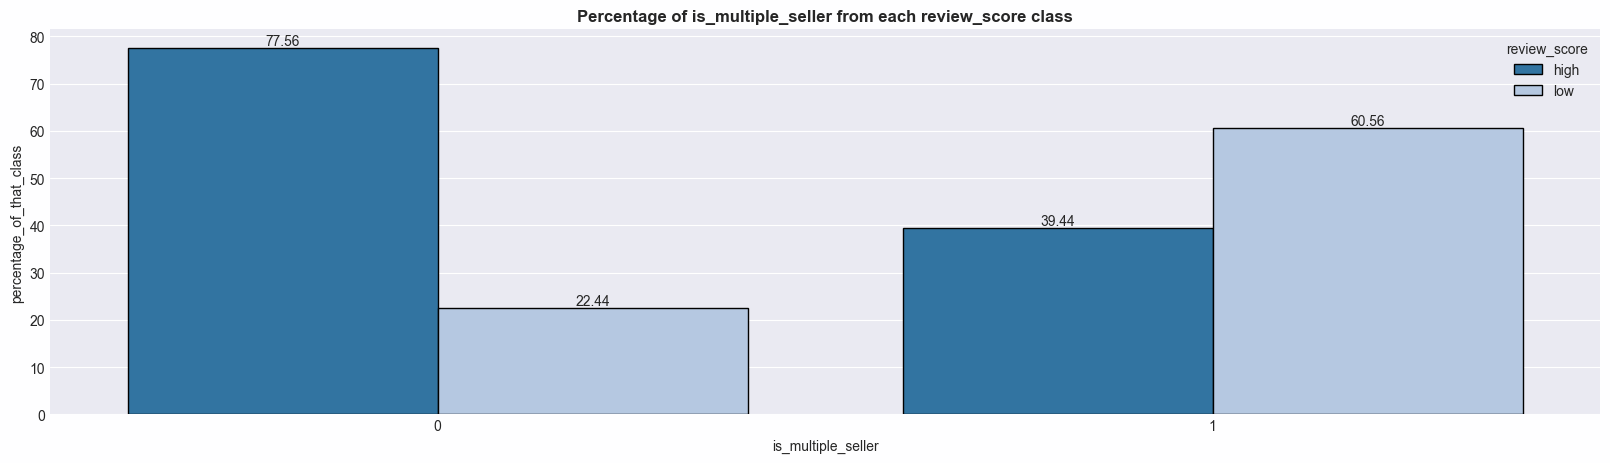

In [21]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_multiple_seller',data=data,target='review_score',orient='v')

**orders where more than 1 seller is used is showing more lower reviews**

In [22]:
ct = pd.crosstab(data['is_multiple_seller'],data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.102 → Moderate


**is_multiple_seller have moderate relationship with the review_score column**

***

**payment_type_used**

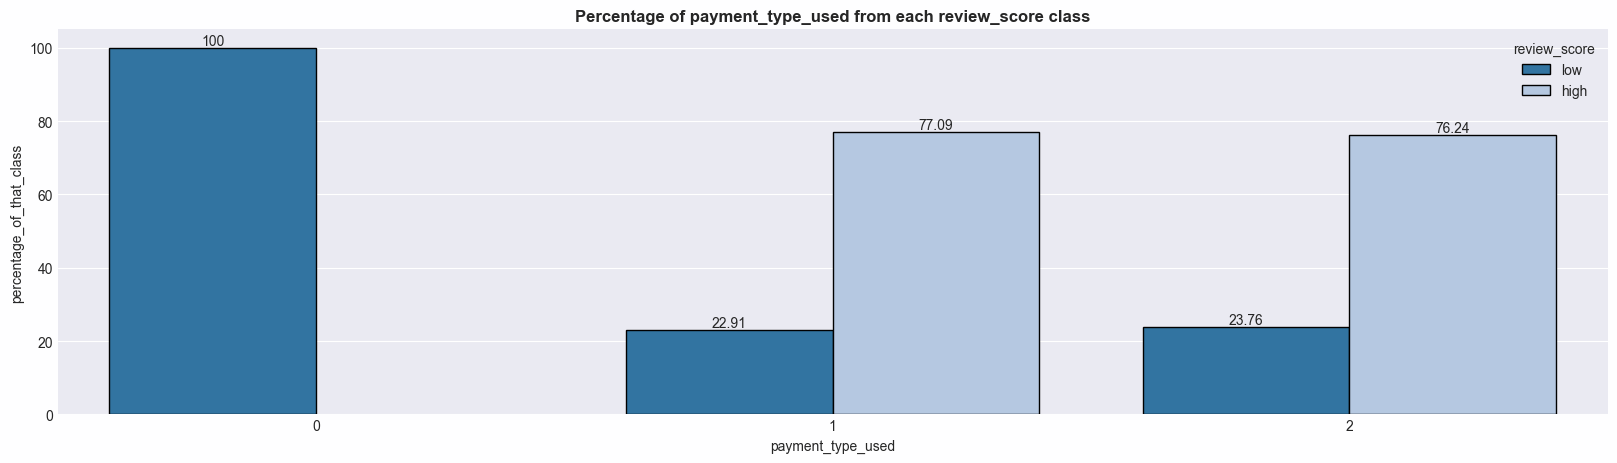

In [23]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='payment_type_used',data=data,target='review_score',orient='v')

In [24]:
data.groupby('payment_type_used')['review_score'].size()

payment_type_used
0        1
1    96984
2     2239
Name: review_score, dtype: int64

**we dont see any stron pattern, although there is 100% 1 star value at payment type used 0, there is only 1 observation...so we are ignoring that**

***

**order_status**

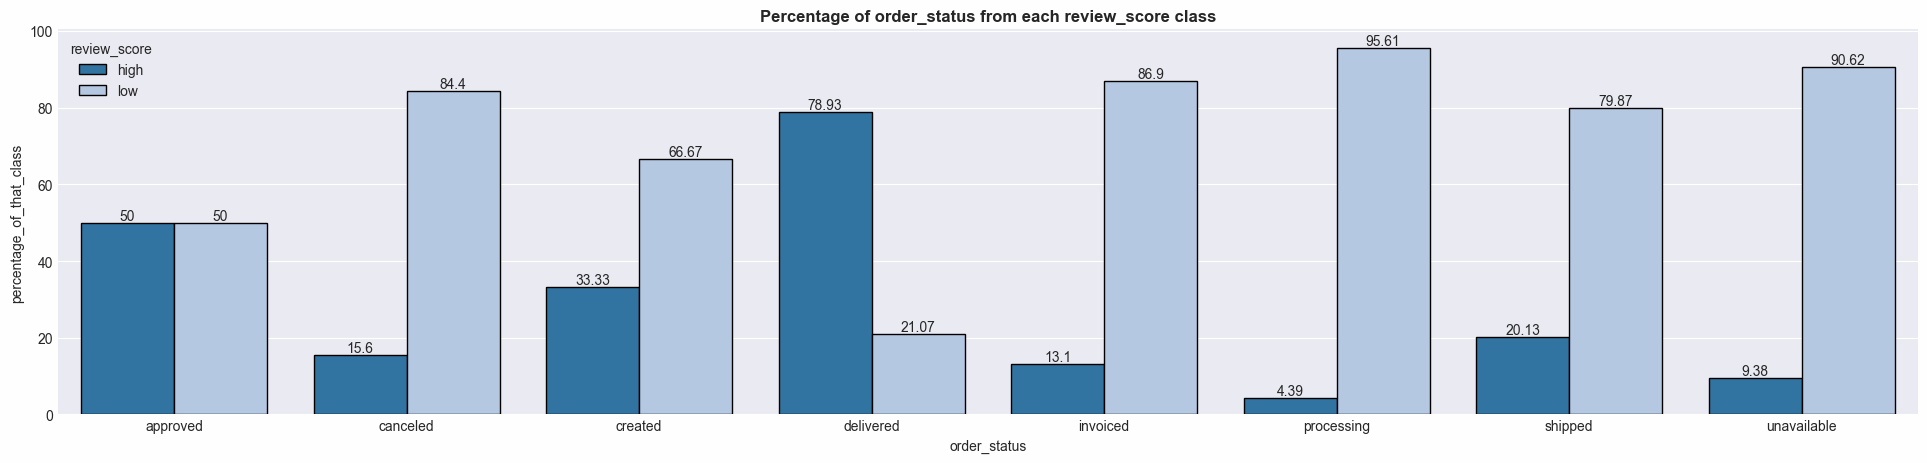

In [25]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='order_status',data=data,target='review_score',orient='v|')

**as we can see, delivered products are getting high review score**

In [26]:
order_status_mask = (data['order_status']=='delivered')
ct = pd.crosstab(order_status_mask,data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.256 → Moderate


**as we can see, delivered product have high rating compared to other status**

***

**total_unique_products**

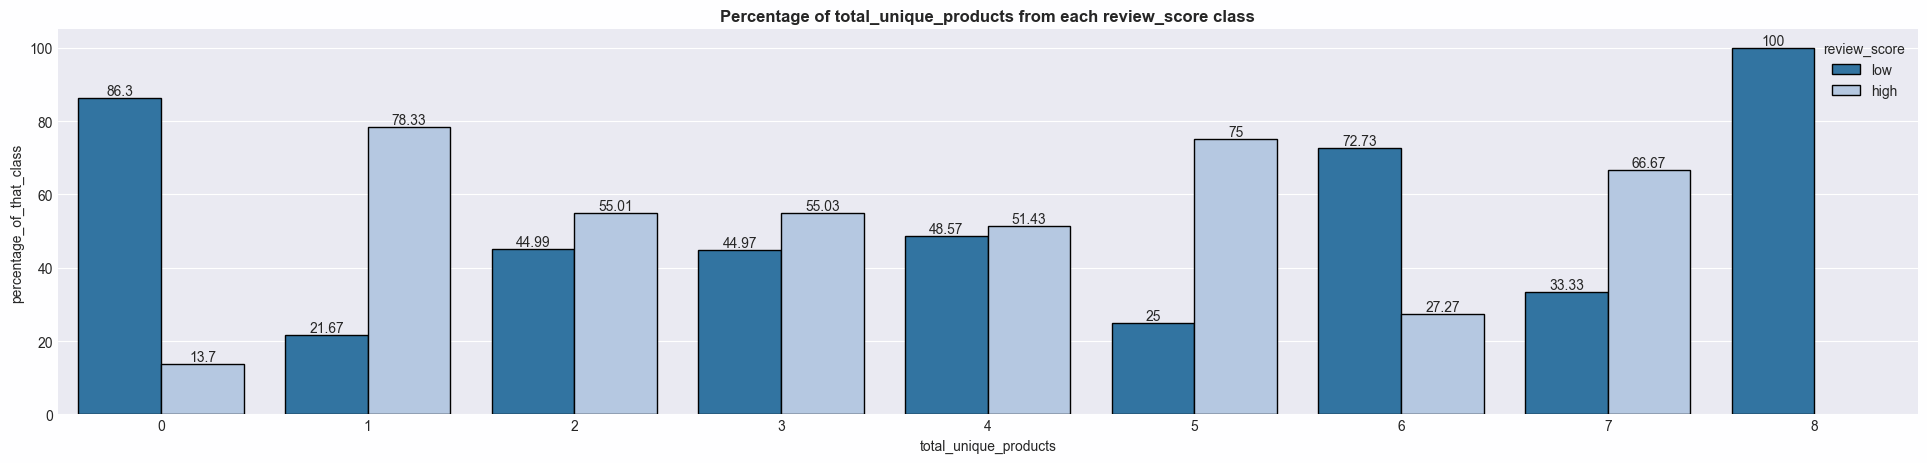

In [27]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='total_unique_products',data=data,target='review_score',orient='v')

In [28]:
data.groupby('total_unique_products')['review_score'].size()

total_unique_products
0      759
1    95227
2     2847
3      298
4       70
5        8
6       11
7        3
8        1
Name: review_score, dtype: int64

**we see a more percentage of lower rating for total_unique_products 0 with atleast 500 observations**

In [29]:
total_unique_product_mask = (data['total_unique_products']==0)
ct = pd.crosstab(total_unique_product_mask,data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.132 → Moderate


**as we can see there is a moderate relationship with total uniqe products 0 and review**

***

**avg_price**

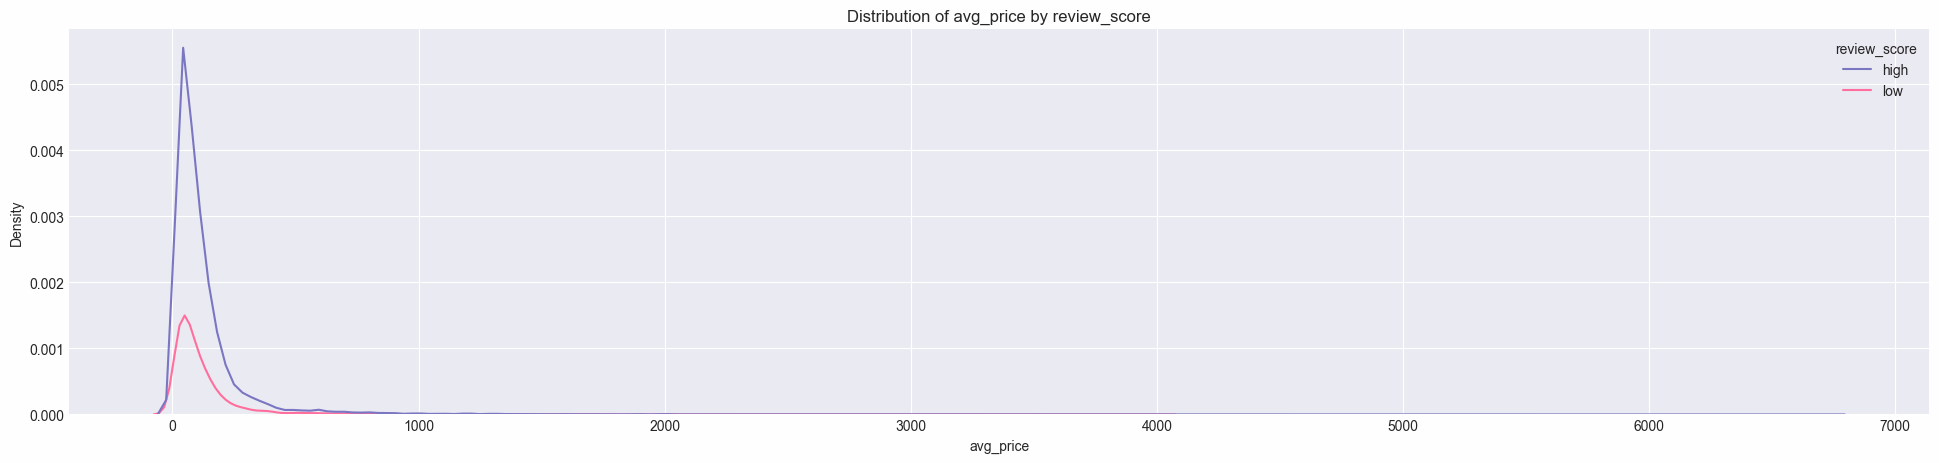

In [30]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_price',data= data,target='review_score')

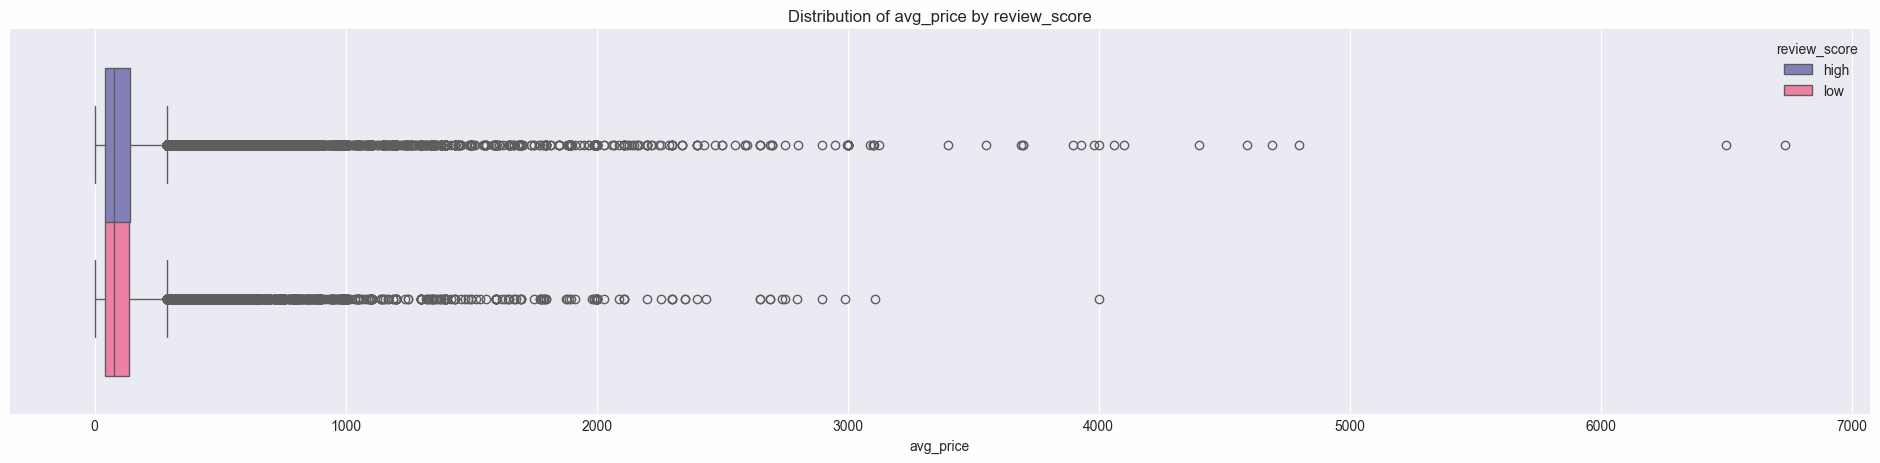

In [31]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_price',data= data,target='review_score')

In [32]:
data.groupby('review_score')['avg_price'].mean().round(2)

review_score
high    124.89
low     123.76
Name: avg_price, dtype: float64

**we do not see anything different**

***

**avg_freight**

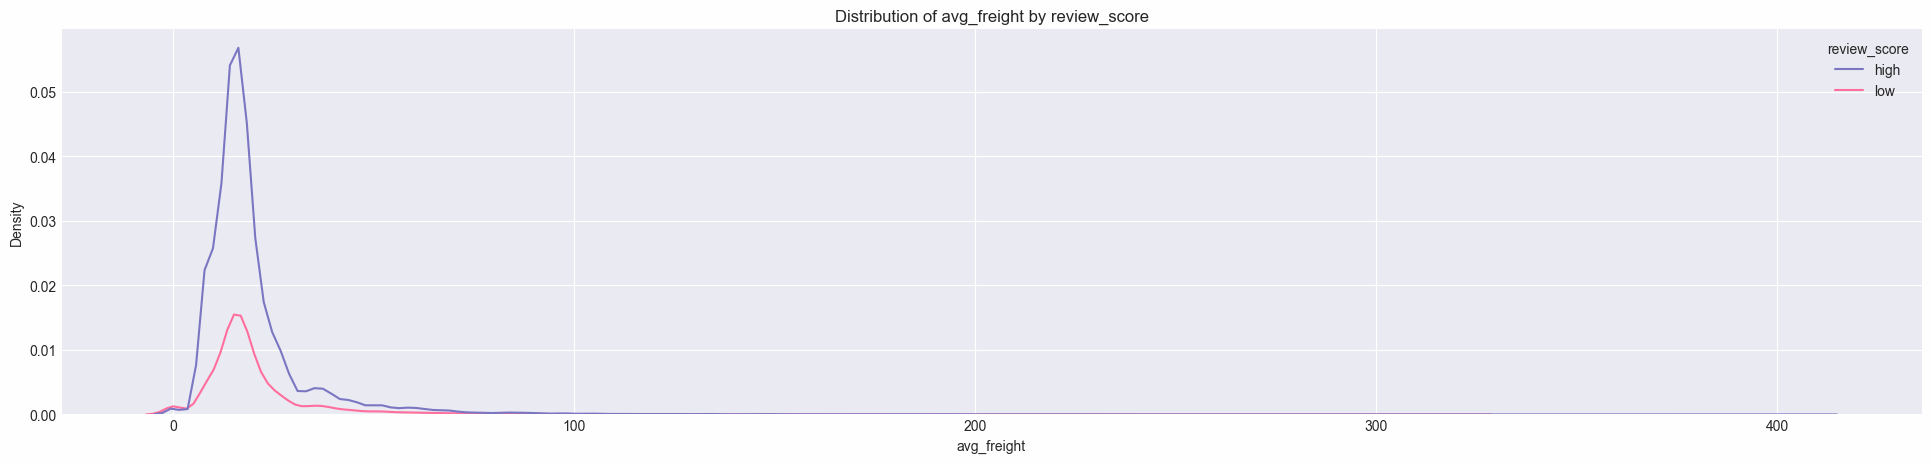

In [33]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_freight',data= data,target='review_score')

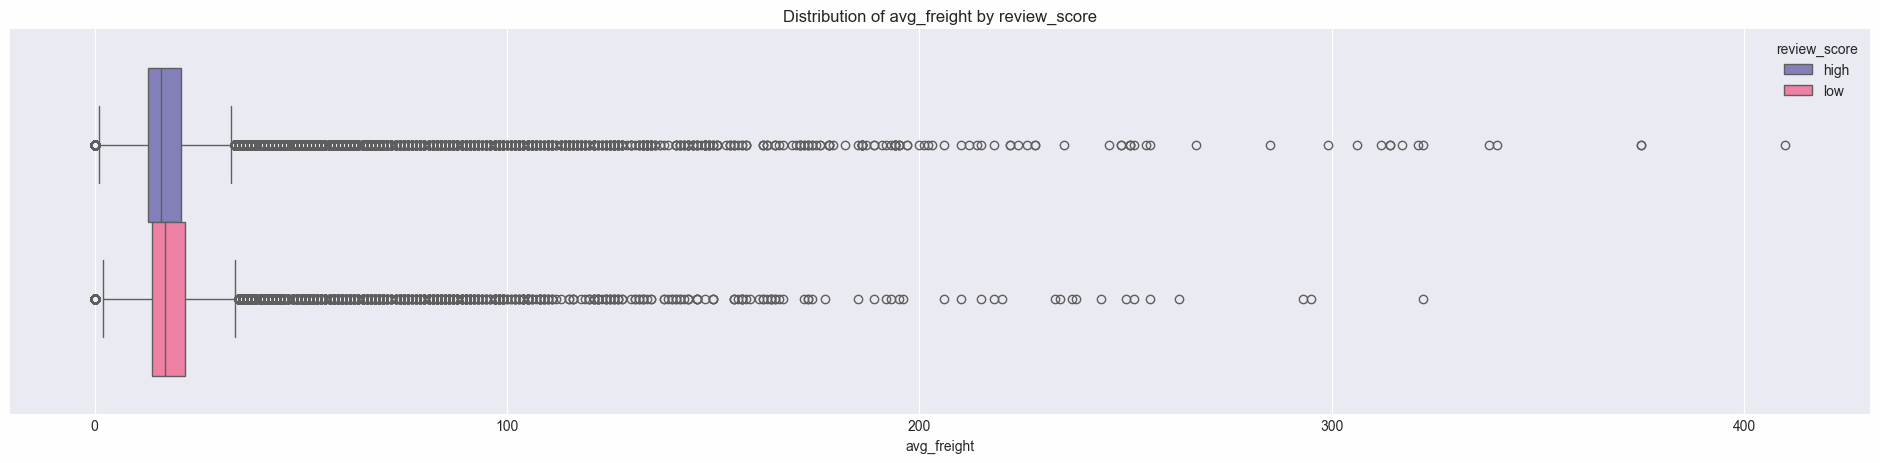

In [34]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_freight',data= data,target='review_score')

In [35]:
data.groupby('review_score')['avg_freight'].mean().round(2)

review_score
high    19.87
low     20.51
Name: avg_freight, dtype: float64

**we dont see anything specific**

***

**max_attempt**

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_8968\3016915708.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ct = ct.applymap(lambda x: np.log1p(x))


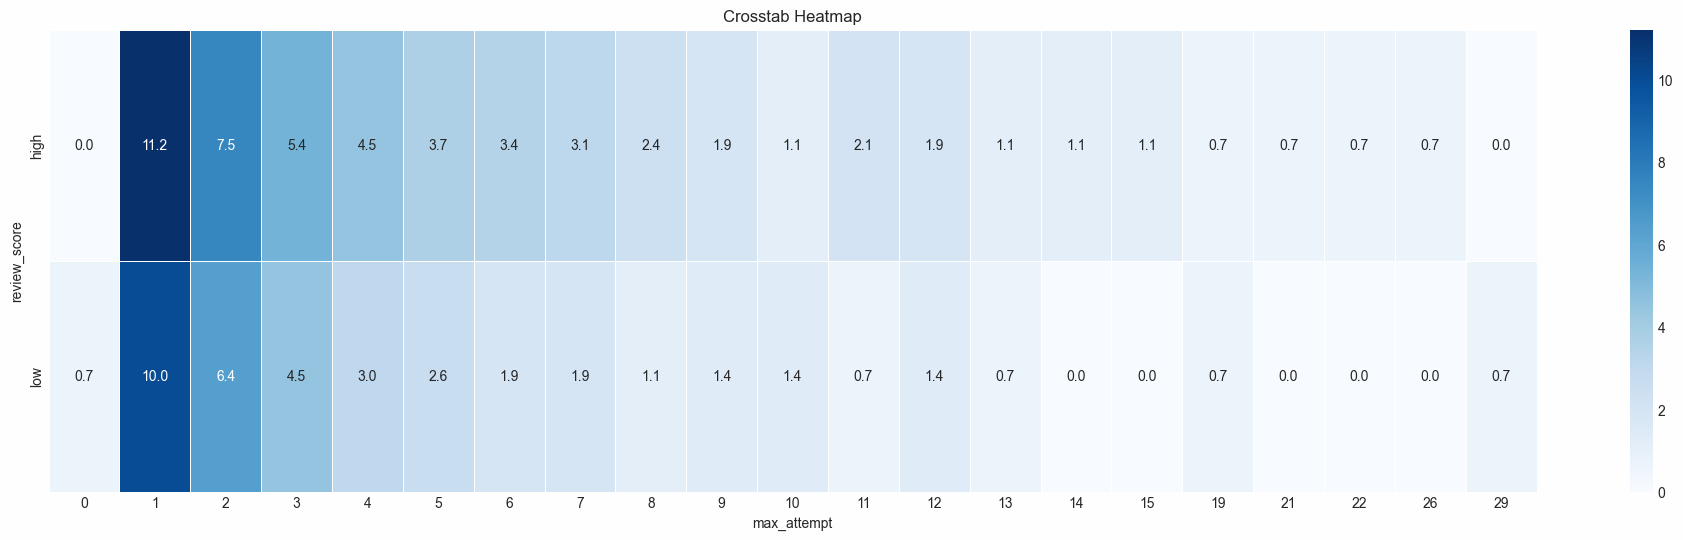

In [36]:
plt.figure(figsize=(24,6))
ct = pd.crosstab(data['review_score'],data['max_attempt']).round(2)
ct = ct.applymap(lambda x: np.log1p(x))
P.plot_heatmap(ct=ct)
plt.show()

**rating is slightly for less max_attempts**

In [37]:
ct = pd.crosstab(data['max_attempt'],data['review_score'])
S.chi_sqared_test(ct)

Chi-square p-value: 0.11551
Cramer's V: 0.017 → Weak


**max attempt have weak relationship with review score column**

***

**installment_duration**

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_8968\683951835.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ct = ct.applymap(lambda x: np.log1p(x))


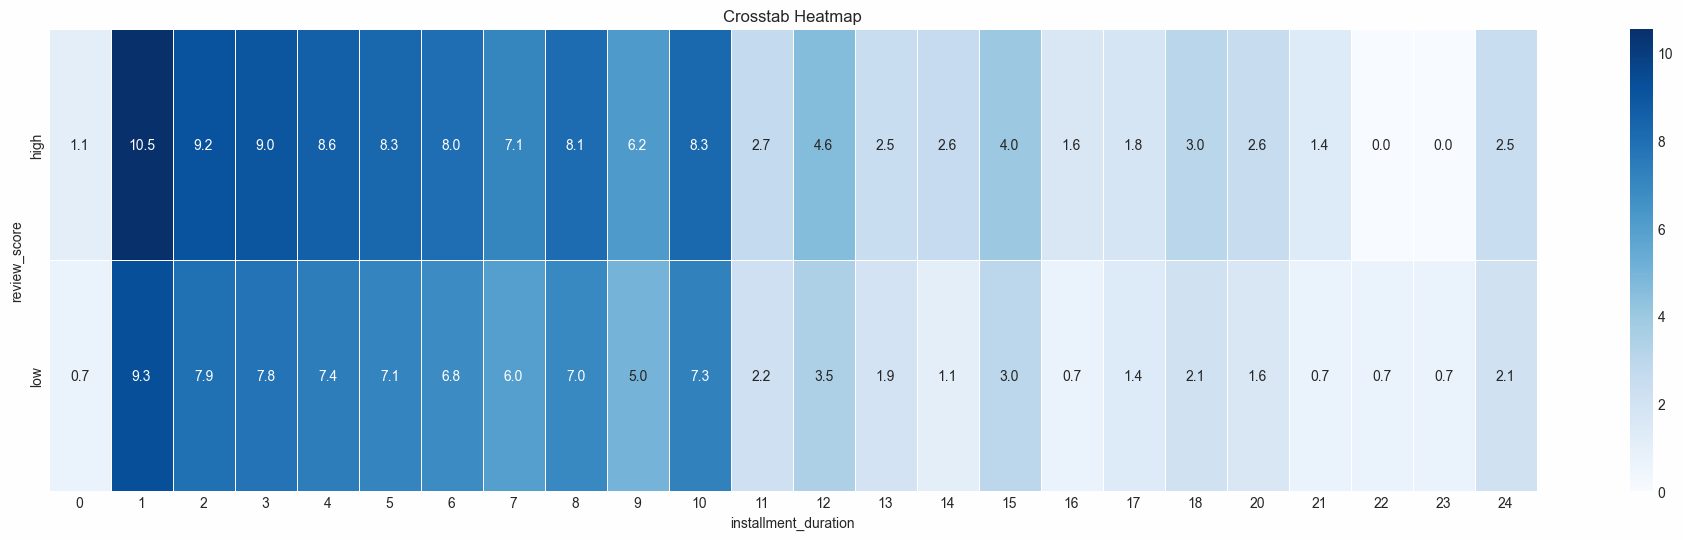

In [38]:
plt.figure(figsize=(24,6))
ct = pd.crosstab(data['review_score'],data['installment_duration']).round(2)
ct = ct.applymap(lambda x: np.log1p(x))
P.plot_heatmap(ct=ct)
plt.show()

**in certain cases, higher the installment duration, less the low rating**

In [39]:
ct = pd.crosstab(data['installment_duration'],data['review_score'])
S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.034 → Weak


**weak relationship with review score**

***

**total_paid_value**

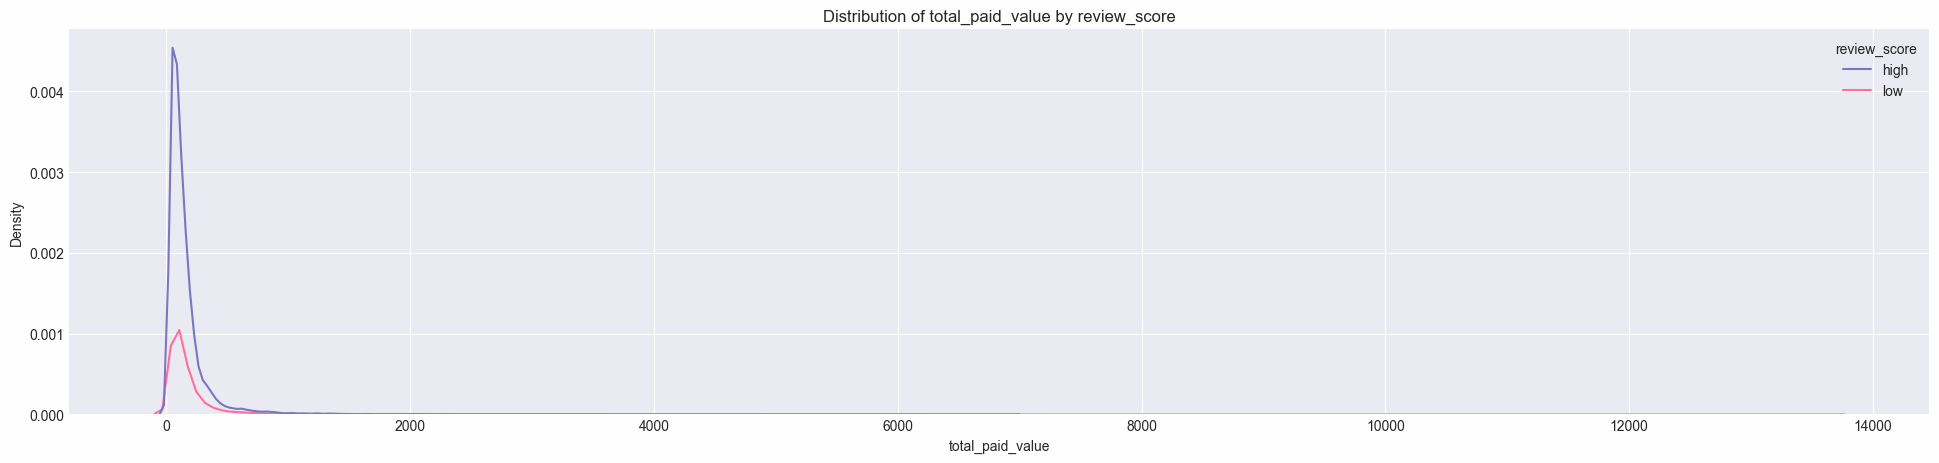

In [41]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_paid_value',data= data,target='review_score')

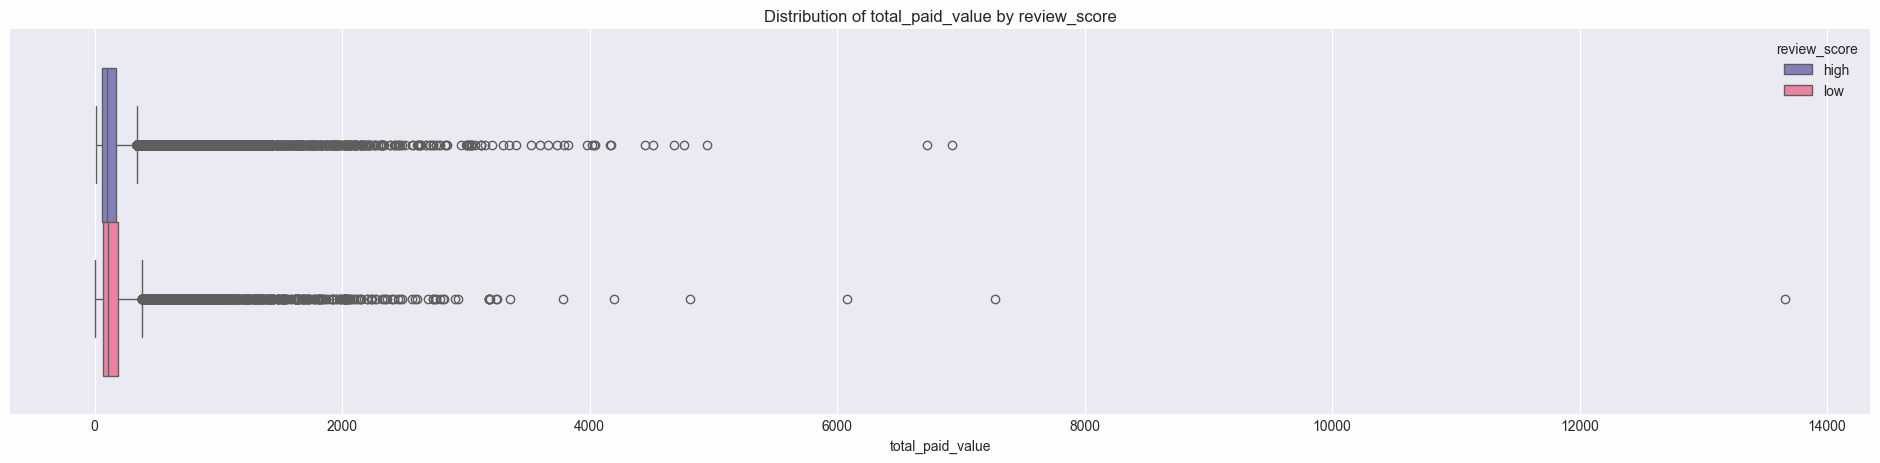

In [42]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_paid_value',data= data,target='review_score')

In [44]:
data.groupby('review_score')['total_paid_value'].median().round(2)

review_score
high    103.04
low     112.28
Name: total_paid_value, dtype: float64

**mean is different for that outlier**

***

**approval_time**

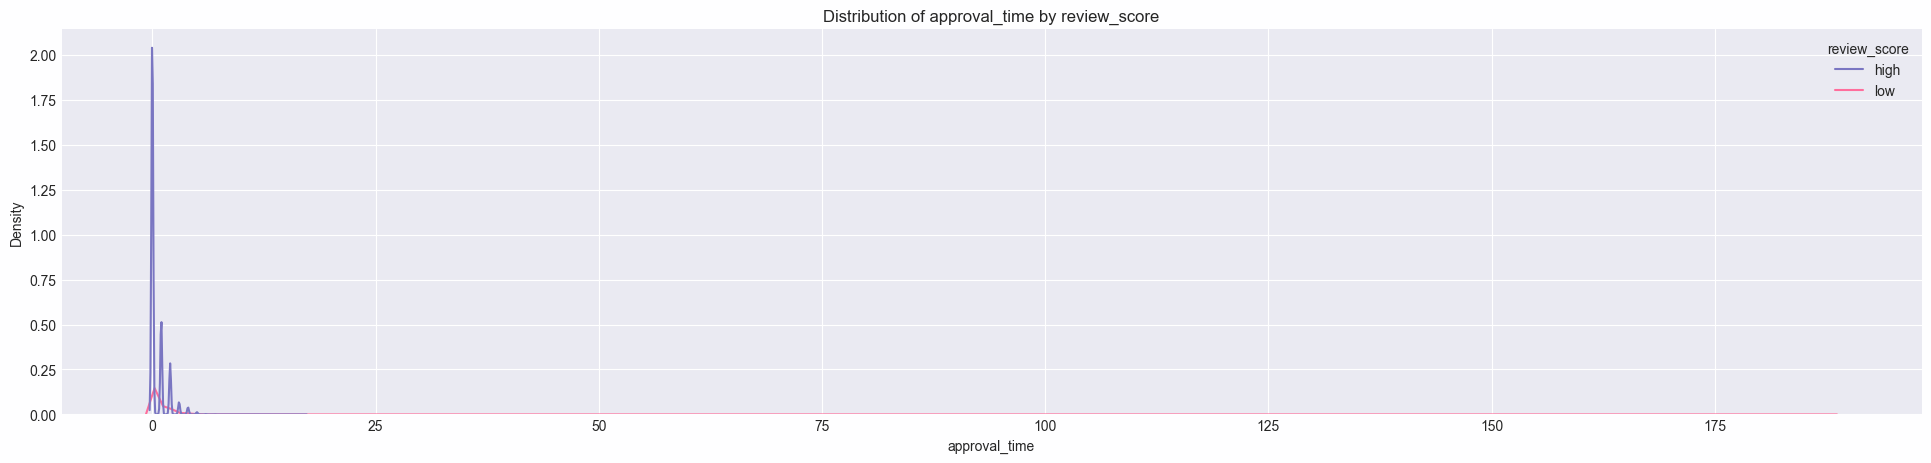

In [48]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='approval_time',data= data,target='review_score')

In [49]:
data.groupby('review_score')['approval_time'].mean().round(2)

review_score
high    0.51
low     0.56
Name: approval_time, dtype: float64

**no such difference**

***

**approval time**

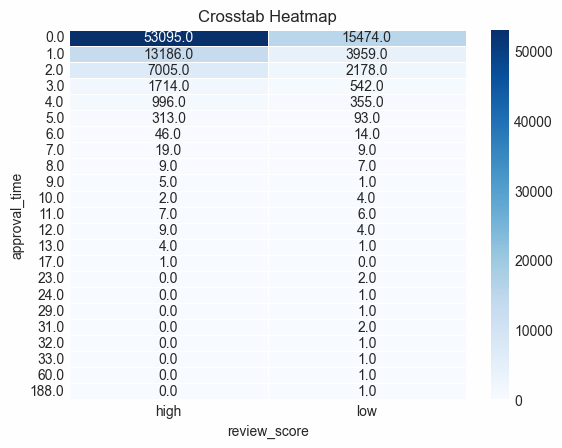

In [46]:
ct = pd.crosstab(data['approval_time'],data['review_score'])

P.plot_heatmap(ct)

**higher installment leads to more lower review**

In [47]:
ct = pd.crosstab(data['approval_time'],data['review_score'])
S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.026 → Weak


**weak relationship with approval time**

***

**delivery_delay**

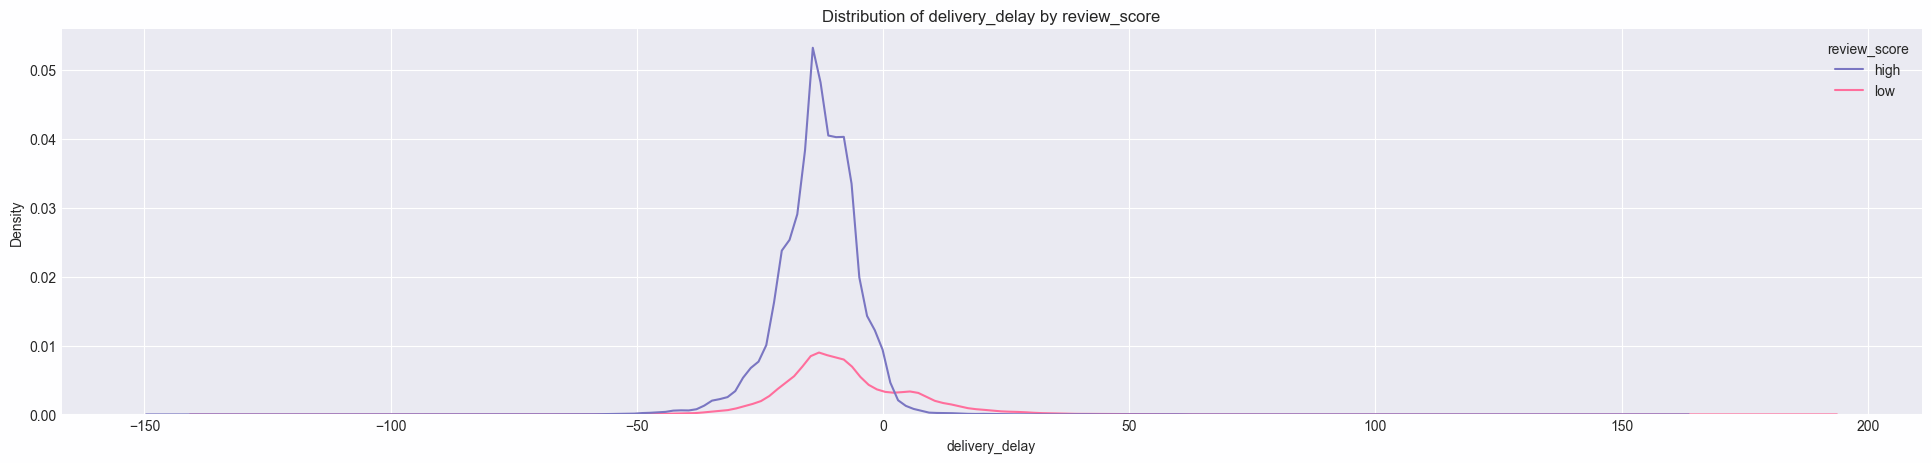

In [50]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='delivery_delay',data= data,target='review_score')

In [51]:
data.groupby('review_score')['delivery_delay'].mean().round(2)

review_score
high   -13.14
low     -7.35
Name: delivery_delay, dtype: float64

In [52]:
S.numerical_test(data,'review_score','delivery_delay','high')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: medium


**faster the delivery higher the rating**

***

**dimensional weight**

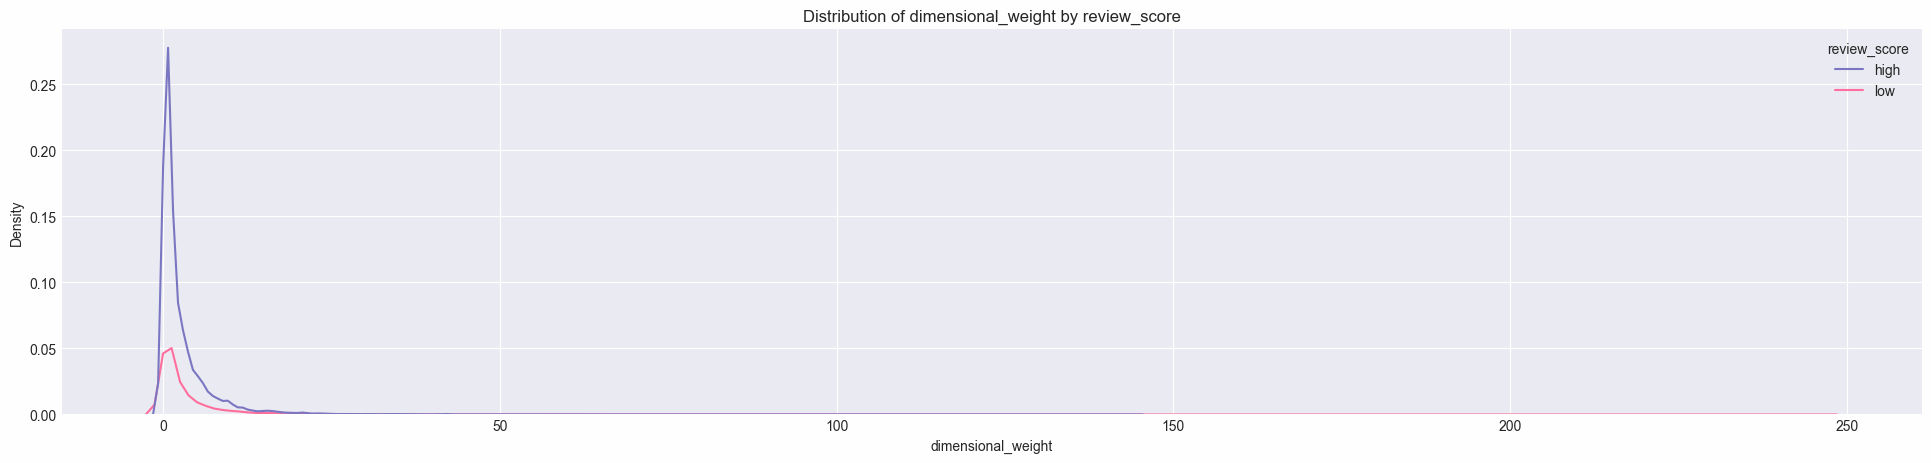

In [55]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='dimensional_weight',data= data,target='review_score')

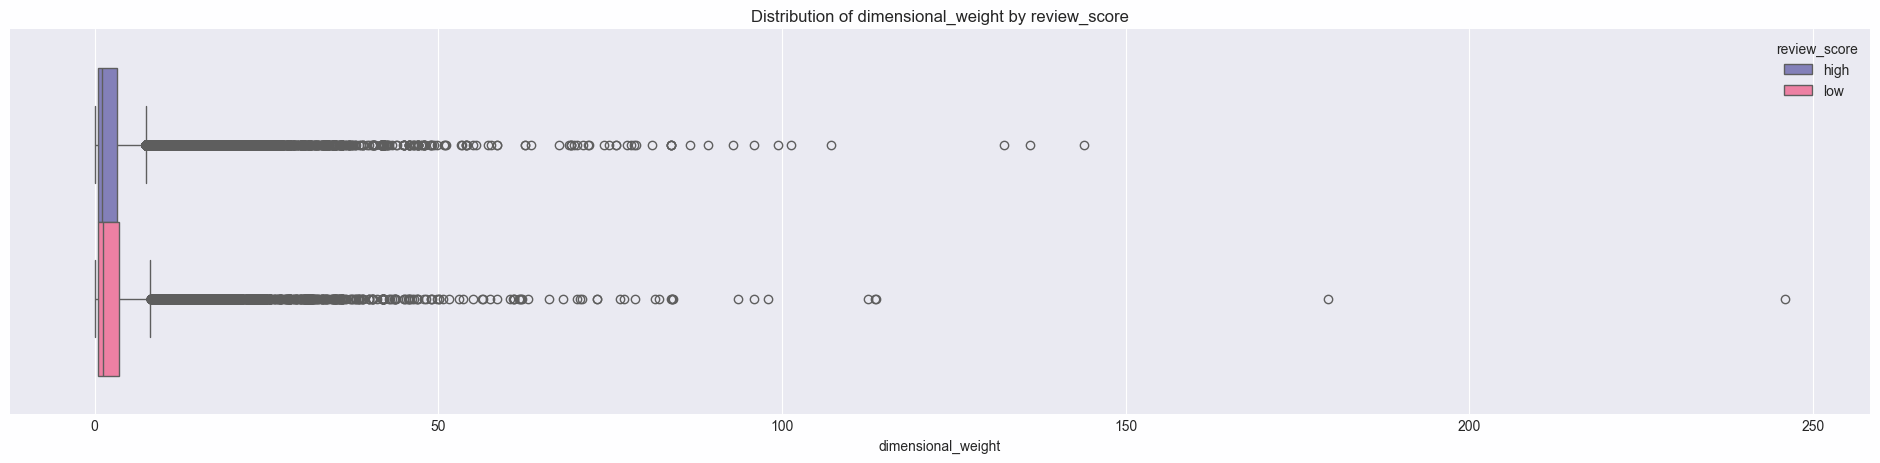

In [56]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='dimensional_weight',data= data,target='review_score')

In [57]:
data.groupby('review_score')['dimensional_weight'].mean().round(2)

review_score
high    2.75
low     3.30
Name: dimensional_weight, dtype: float64

In [58]:
S.numerical_test(data,'review_score','dimensional_weight','high')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: very weak


**very weak relationship**

***

### ***Findings from bivariate analysis with review_score column***

**categorical with `review_score` column**

- plot showed there were more low ratings where there was multiple sellers used in individual order, after doing statistical test we can validate that there is moderate relationship with `is_multiple_seller` and `review_score` columns

- visuals showed that non - delivered products have relatively low rating, after doing statistical test we can validate that `orderstatus` have moderate relationship with `review_score` column

- we saw that where total unique products is 0, means customer was unable to order anything...there were low rating, after statistical test we can validate this because there is moderate relationship with `total_unique_products` and `review_score` column

- `visuals showed that faster the delivery higher the rating, after doing statistical test we can validate this`
